# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Decision Tree (CART-Classification and Regression Trees)</b></p>

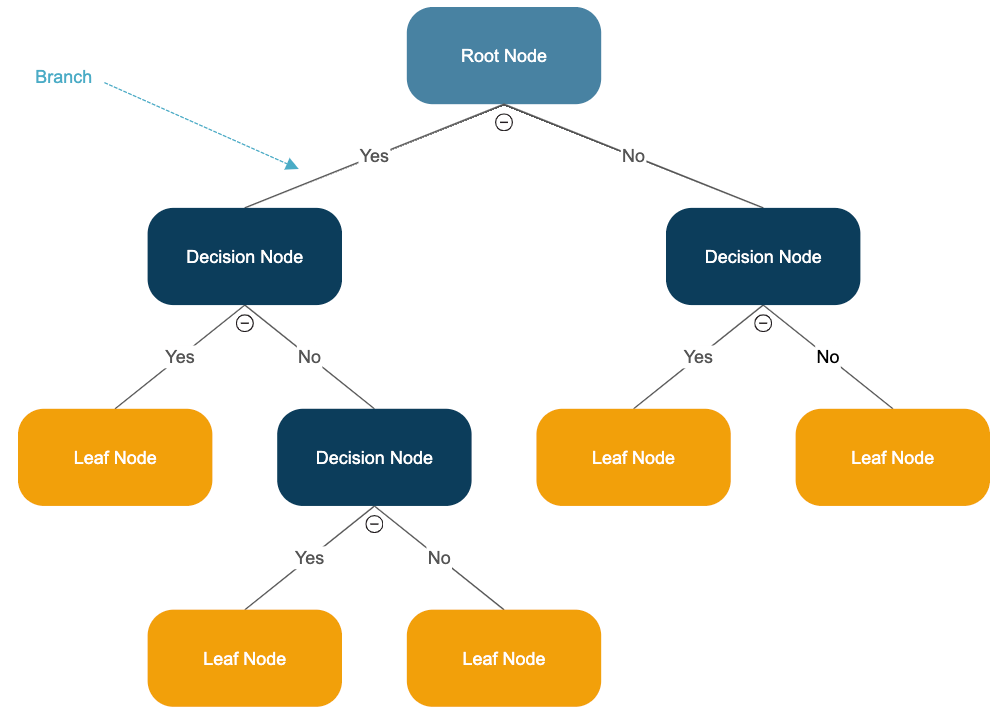

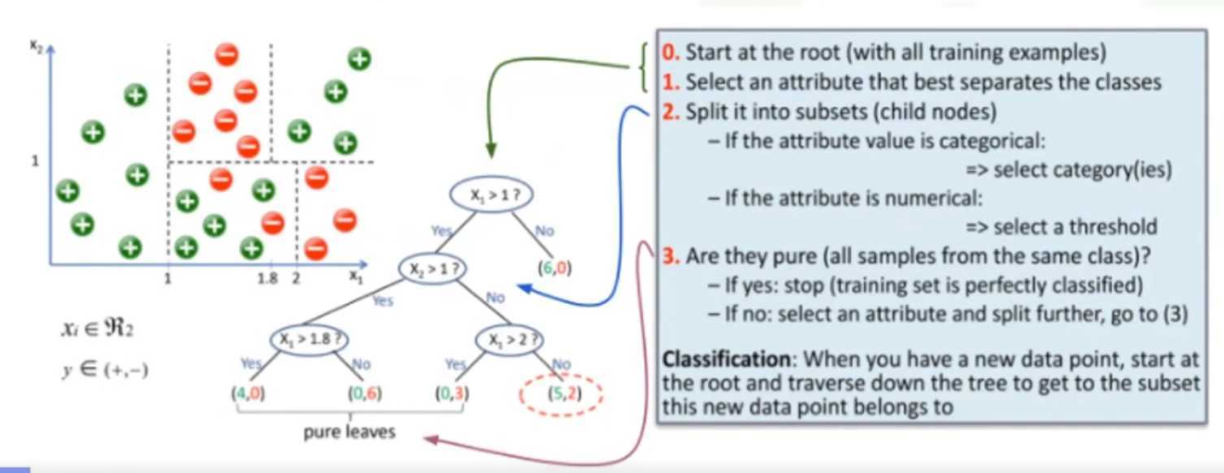

# Exploratory Data Analysis

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

import pygwalker as pyg #pip install pygwalker

In [125]:
df0 = pd.read_csv("penguins_size.csv")
df = df0.copy()

In [126]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [128]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

In [129]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [130]:
10/344

# missing valueslar datamın %3'ne takabül ettiğinden drop ediyorum.

0.029069767441860465

In [131]:
df = df.dropna()

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [133]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [134]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

In [135]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [136]:
unique_values(df, cat_features)

# object featurların unique kategorik gözlemlerini listeliyoruz. Sex'te "." olarak yanlış bir kategorik veri var. Bundan
# kurtulmamız gerekiyor.

Column: species
------------------------------
Unique Values (3): ['Adelie' 'Chinstrap' 'Gentoo']

Value Counts:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

Column: island
------------------------------
Unique Values (3): ['Torgersen' 'Biscoe' 'Dream']

Value Counts:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

Column: sex
------------------------------
Unique Values (3): ['MALE' 'FEMALE' '.']

Value Counts:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [137]:
df[df["sex"]=="."]

# sex featurandaki yanlış kategorik veriyi tespit ediyoruz.

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [138]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [139]:
df.loc[336, "sex"] = "MALE"

In [140]:
df.loc[336, "sex"]

'MALE'

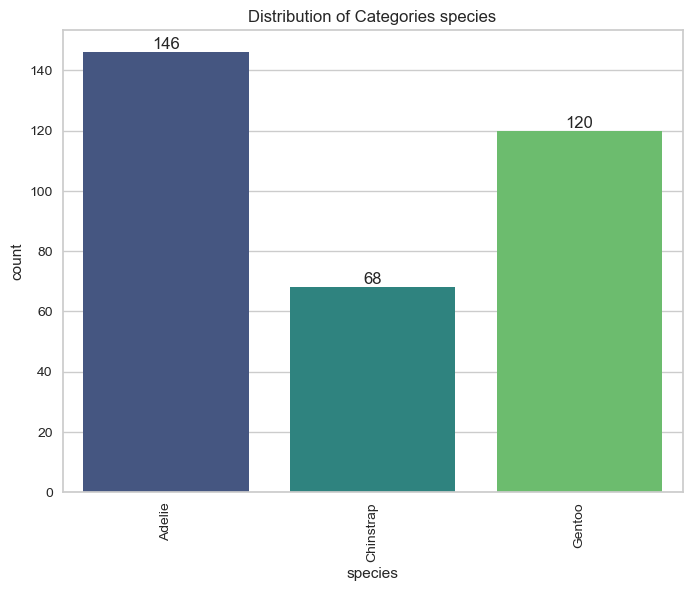

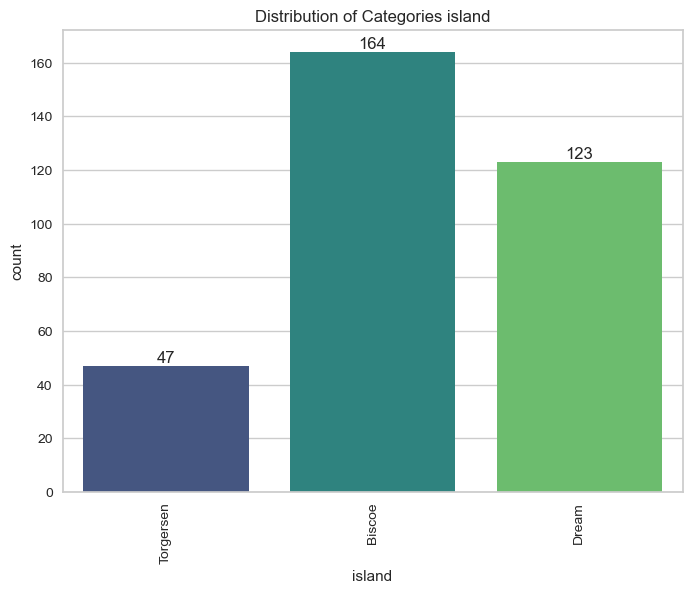

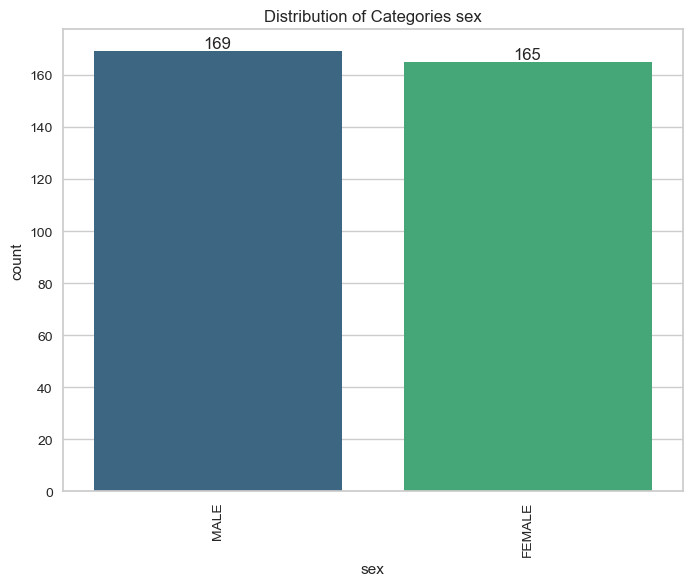

In [141]:
# Kategorik feature ların dağılımını göstermek için;

cat_features = df.select_dtypes(include='object').columns

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [142]:
df["species"].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

[Text(0, 0, '146'), Text(0, 0, '68'), Text(0, 0, '120')]

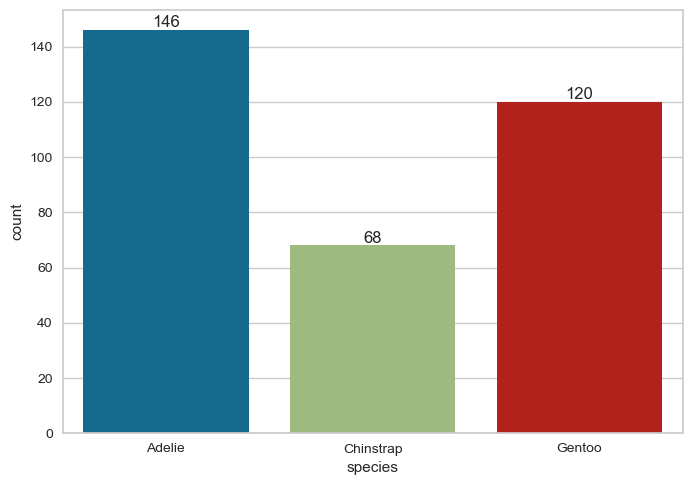

In [143]:
ax = sns.countplot(x="species", data=df)
ax.bar_label(ax.containers[0])

# Datamda bir inbalanced durumu söz konusu ancak dataya bir inbalanced muamelesinde bulunup bulunmayacağımıza
# scorları gördükten sonra karar vereceğiz.

[Text(0, 0, '73'), Text(0, 0, '34'), Text(0, 0, '58')]

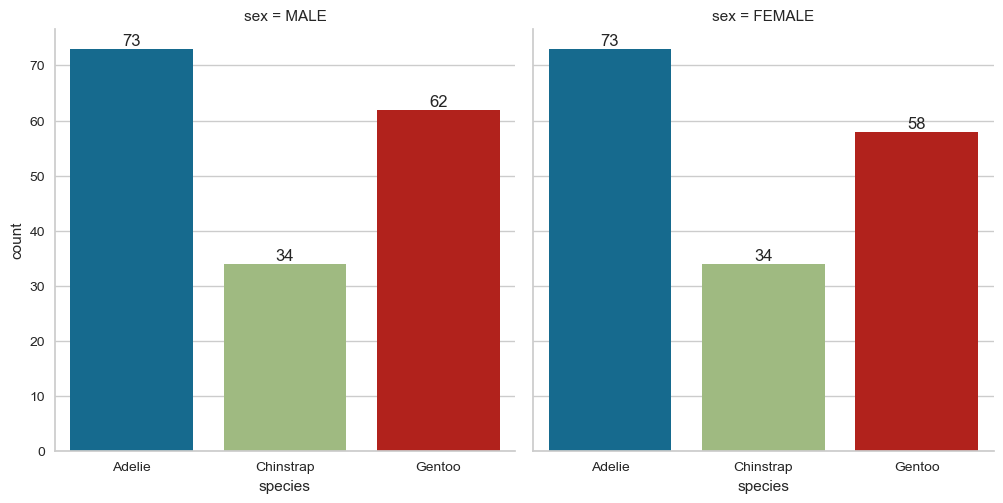

In [144]:
g = sns.catplot(x="species", data=df, kind="count", col="sex")

g.facet_axis(0, 0).bar_label(container=g.facet_axis(0, 0).containers[0])
g.facet_axis(0, 1).bar_label(container=g.facet_axis(0, 1).containers[0])

[Text(0, 0, '73'), Text(0, 0, '34'), Text(0, 0, '62')]

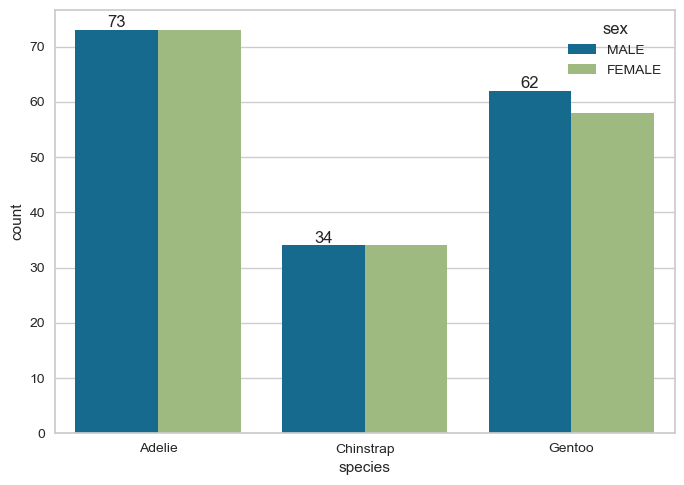

In [145]:
ax = sns.countplot(x="species", hue="sex", data=df)
ax.bar_label(ax.containers[0])

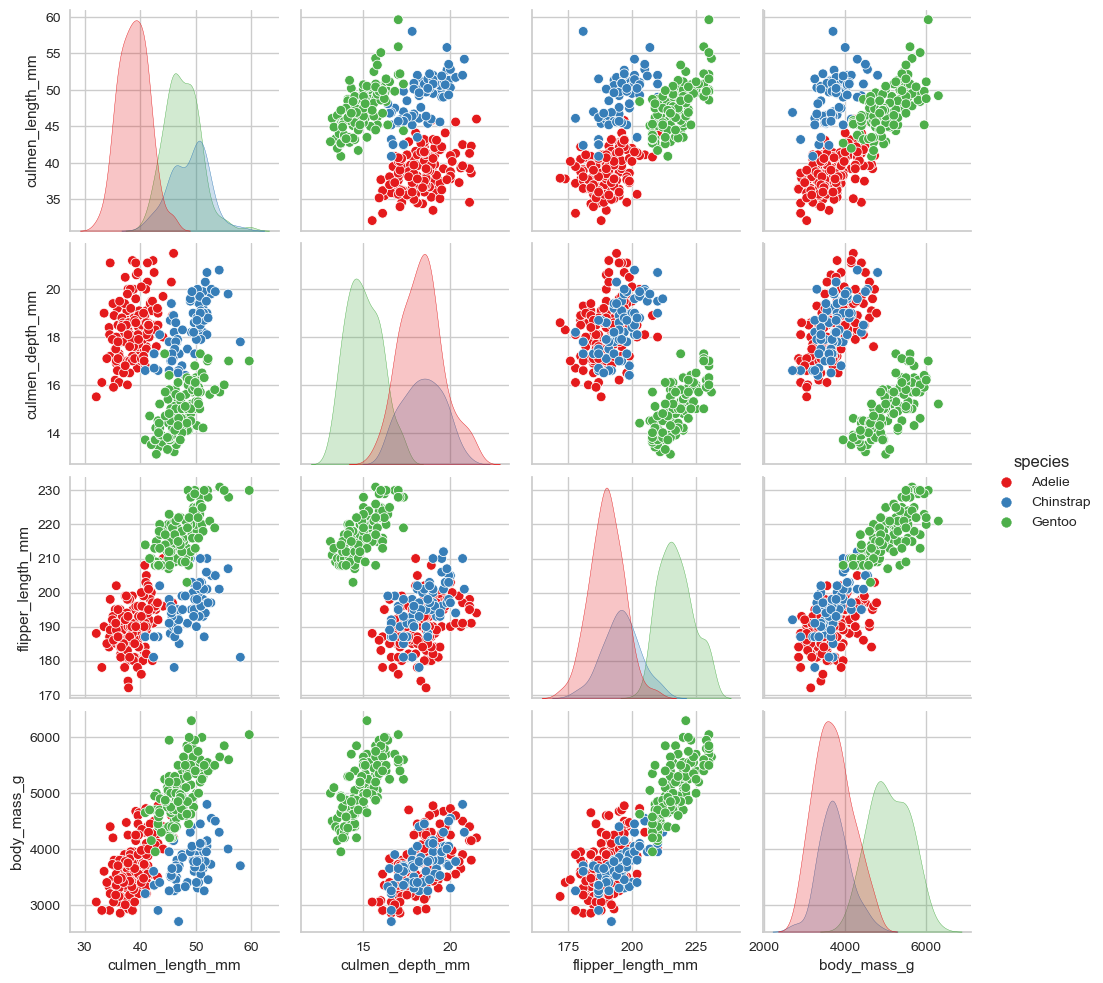

In [146]:
sns.pairplot(df, hue="species", palette="Set1");

# Burda herbir featuran ne kadar ayırt edici özellikte olduğunu görmekle birlikte labelların hangi featurlar özelinde
# nasıl ayrıştıklarını da görebiliyoruz.

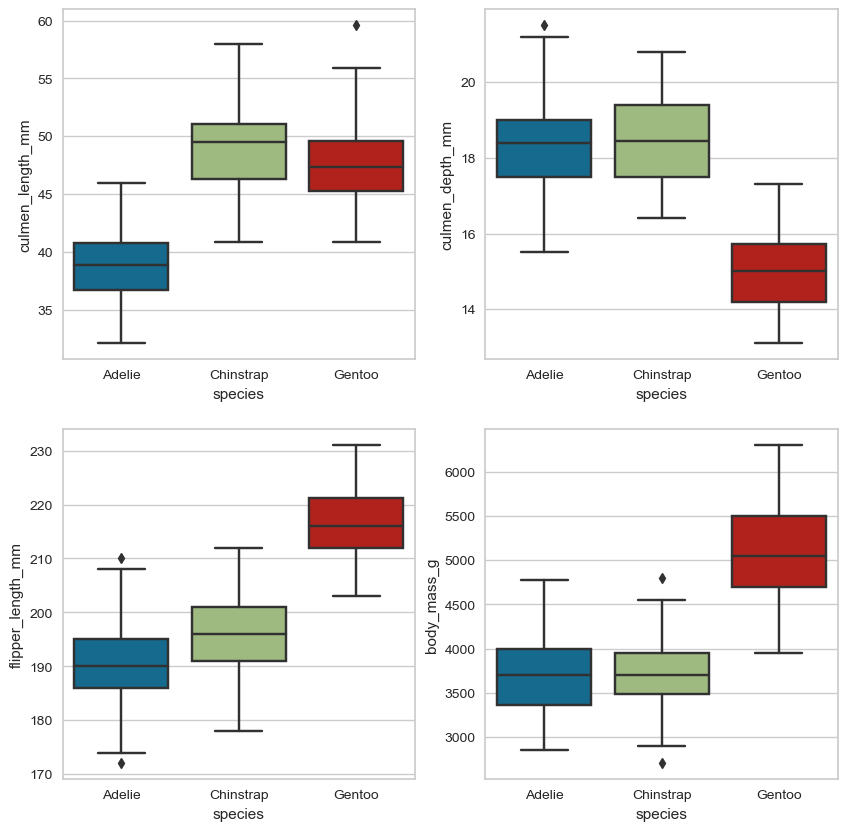

In [147]:
index = 0
plt.figure(figsize=(10, 10))
for feature in df.select_dtypes("number"):
    if feature != "species":
        index += 1
        plt.subplot(2, 2, index)
        sns.boxplot(x='species', y=feature, data=df)

# pair plotdan aldığımız insight ları burdan da alabiliyoruz.

In [148]:
import plotly.express as px  

In [149]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

# 3 boyutlu olarak baktığımızda labelların birbirinden iyi ayrıştıklarını görebiliyoruz.

In [150]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0006129e380c3ac0n8CNpRzQu67HOmqt" style="height: auto">\n    <head>…

In [28]:
num_features

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [29]:
df.select_dtypes("number")

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

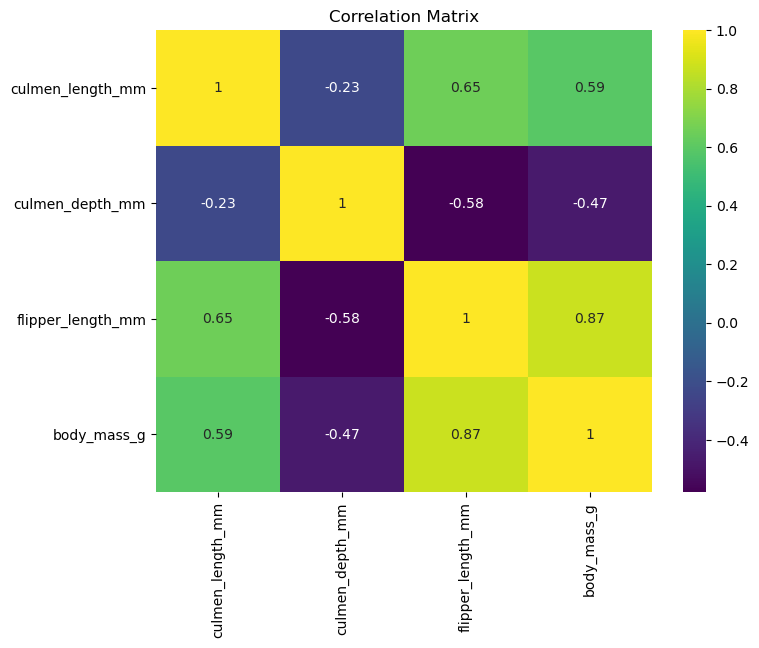

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

# tree based modeller non-parametric(katsayıları olmayan) modellerden olduklarından multicolonarty problem değildir. 

# Modelling

## Train | Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(columns="species")
y = df['species']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Ordinal Encoder

In [34]:
cat = X_train.select_dtypes("object").columns
cat

# Dönüşümleri train datasındaki unique kategorik verilere göre yapacağımızdan öncelikle train datasındaki
# kategorik featurları tespit ediyoruz.

Index(['island', 'sex'], dtype='object')

In [35]:
X_train[cat]

island     sex
293     Biscoe  FEMALE
183      Dream    MALE
211      Dream  FEMALE
193      Dream  FEMALE
134      Dream  FEMALE
..         ...     ...
108     Biscoe  FEMALE
1    Torgersen  FEMALE
53      Biscoe    MALE
67      Biscoe    MALE
44       Dream  FEMALE

[267 rows x 2 columns]

In [36]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit_transform(X_train[cat])

# data leakagenin önüne geçebilmek maksadıyla one hot encoderda yaptığımız gibi dönüşümleri train datasındaki 
# unique kategorik verilere göre yapacağımızdan train datasının kategorik featurlarına fit_transform işlemi uyguluyoruz.

array([[0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [2., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [2., 1.],
       [2., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [2., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.

In [37]:
X_train[cat] = enc.fit_transform(X_train[cat])
X_train[cat]

# X_train df'inin kategorik featurlardaki gözlemleri numerice dönüştürüyoruz.

island  sex
293     0.0  0.0
183     1.0  1.0
211     1.0  0.0
193     1.0  0.0
134     1.0  0.0
..      ...  ...
108     0.0  0.0
1       2.0  0.0
53      0.0  1.0
67      0.0  1.0
44      1.0  0.0

[267 rows x 2 columns]

In [38]:
X_train.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
293     0.0              46.5             14.8              217.0   
183     1.0              54.2             20.8              201.0   
211     1.0              45.6             19.4              194.0   
193     1.0              46.2             17.5              187.0   
134     1.0              38.1             17.6              187.0   

     body_mass_g  sex  
293       5200.0  0.0  
183       4300.0  1.0  
211       3525.0  0.0  
193       3650.0  0.0  
134       3425.0  0.0

In [39]:
X_test[cat] = enc.transform(X_test[cat])
X_test[cat]

# train datasındaki unique kategorik verilere göre test datasına transform uyguluyoruz.

island  sex
89      1.0  0.0
143     1.0  1.0
341     0.0  1.0
256     0.0  0.0
252     0.0  0.0
..      ...  ...
280     0.0  0.0
153     1.0  1.0
195     1.0  0.0
334     0.0  0.0
307     0.0  1.0

[67 rows x 2 columns]

In [40]:
X_test.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
89      1.0              38.9             18.8              190.0   
143     1.0              40.7             17.0              190.0   
341     0.0              50.4             15.7              222.0   
256     0.0              42.6             13.7              213.0   
252     0.0              45.1             14.5              207.0   

     body_mass_g  sex  
89        3600.0  0.0  
143       3725.0  1.0  
341       5750.0  1.0  
256       4950.0  0.0  
252       5050.0  0.0

## Modelling with Pipeline & ColumnTransformer

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# yukarıda train ve test setlerimiz numeric formlara dönüştüğünden train ve test setinin orjinal hallerine geri dönmeleri
# için orjinal datamızı tekrar train ve test setlerine ayırıyoruz.

In [42]:
X_train.sample(3)

# orjinal hallerine döndüğünü gördük

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
22      Biscoe              35.9             19.2              189.0   
119  Torgersen              41.1             18.6              189.0   
215      Dream              55.8             19.8              207.0   

     body_mass_g     sex  
22        3800.0  FEMALE  
119       3325.0    MALE  
215       4000.0    MALE

In [43]:
X_test.sample(3)

# orjinal hallerine döndüğünü gördük

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
147   Dream              36.6             18.4              184.0   
255  Biscoe              48.4             16.3              220.0   
101  Biscoe              41.0             20.0              203.0   

     body_mass_g     sex  
147       3475.0  FEMALE  
255       5400.0    MALE  
101       4725.0    MALE

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

# make_column_transformer fonksiyonu featurlara yapılacak dönüşümleri otomotize eder.
# Bu fonksiyonun içerisine vereceğimiz sıralamaya göre featurlara sıra ile dönüşüm uygular.

# Ordinal encoder algortiması içerisinde handle_unknown parametresi defaul olarak "error"dür. 
# Eğer bunu errorde bırakırsak train datasında olmayıp test datasında olan bir kategorik veri ile karşılaşıldığında 
# algoritma hata döndürür. 

# Ancak handle_unknown='use_encoded_value' ve unknown_value=-1 olarak ayarlanırsa train datasında olmayıp 
# test datasında olan bir kategorik veriye -1 değeri atanır.
# unknown_value=-1 olarak atama sebebimiz, diğer kategorik verilere verilecek aynı numaranınverilmeyeceğinden emin olmak

# make_column_transformer((ord_enc, cat), remainder='passthrough') fonksiyonu cat değişkenine tanımladığımız kategorik
# featurları yukarıda bahsettiğimiz şekilde önce numeric verilere dönüştürecek, remainder="passthrough" parametresi ile
# numeric featurara hiçbir işlem yapmayacak, olduğu gibi bırakacak.

# remainder='passthrough' ile dönüşüm yapılmayan diğer tüm featurları olduğu gibi bırak anlamına gelir.

# eğer remainder defaul değeri ile "drop" olarak bırakılırsa dönüşüm yapılmayan tüm featurlar df'den drop edilir.
# remainder= MinMaxScaler() veya StandardScaler() yaparsak dönüşüm yapılmayan featurlar haricindeki diğer featurlara
# scale işlem uygulanır.

# make_column_transformer fonksiyonu datanın yapısını değiştiriyor. Categorik feturelar df içerinde ilk featurlar olacak 
# şekilde, numeric featurlar ise onları takip edecek şekilde yeniden sıralanır.

In [45]:
pd.DataFrame(column_trans.fit_transform(X_train))

# make_column_transformer fonksiyonunun df featurlarını gördüğünüz gibi ilk featurlar kategorik sonraki featurlar numeric
# olacak şekilde yeniden sıraladı.

0    1     2     3      4       5
0    0.0  0.0  46.5  14.8  217.0  5200.0
1    1.0  1.0  54.2  20.8  201.0  4300.0
2    1.0  0.0  45.6  19.4  194.0  3525.0
3    1.0  0.0  46.2  17.5  187.0  3650.0
4    1.0  0.0  38.1  17.6  187.0  3425.0
..   ...  ...   ...   ...    ...     ...
262  0.0  0.0  38.1  17.0  181.0  3175.0
263  2.0  0.0  39.5  17.4  186.0  3800.0
264  0.0  1.0  42.0  19.5  200.0  4050.0
265  0.0  1.0  41.1  19.1  188.0  4100.0
266  1.0  0.0  37.0  16.9  185.0  3000.0

[267 rows x 6 columns]

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# fit işlemi ile train datasının önce kategorik featurları tespit edilip bu featurlar içerisindeki unique kategorik
# veriler numeric verilere dönüştürülüyor ve ilgili modele gönderilerek eğitim yapılıyor.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

**Pipeline kullanmasaydık modeli aşağıdaki gibi kurardık.**

from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=101)
DT_model.fit(X_train,y_train)

## Model Performance

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [48]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# predict işlemi test datasını train datasındaki unique kategorik verilere göre transforma tabi tutarak numeric verilere 
# dönüştürüyor.

# pipeline içerisinde make_column_transform olduğundan df yapısı tarain datasında olduğu gibi değiştiriliyor ve predict edilmek 
# üzere ilgili modele gönderiliyor

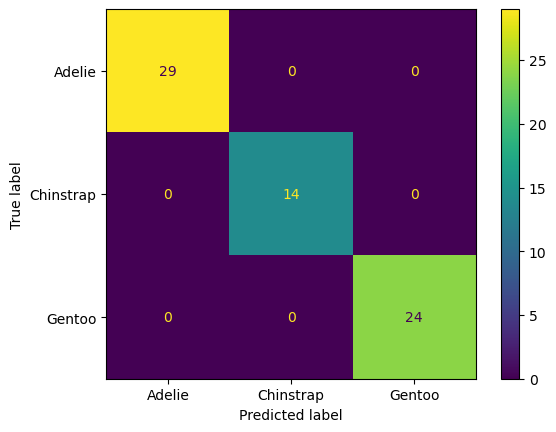

In [49]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

# plot_confusion_matrix(pipe_model, X_test, y_test)

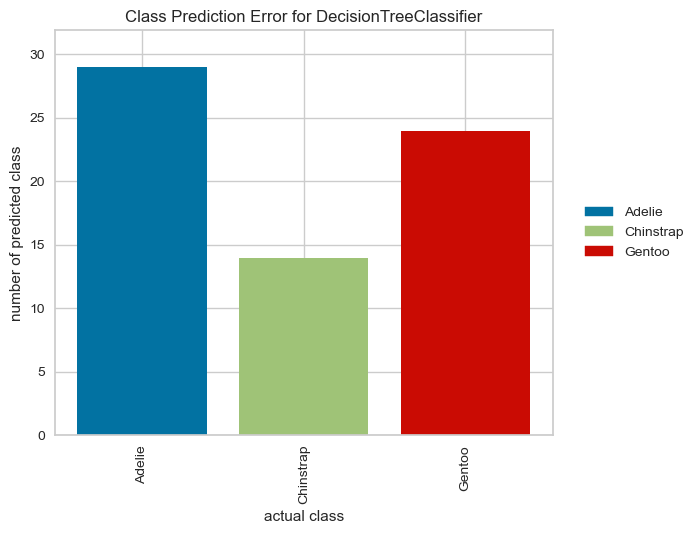

In [50]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

**Decision Tree Algoritmasında Overfitting Sorunu**

- Decision tree, modelleme yapısının en büyük handikaplarından biri olan çok çabuk overfit'e (aşırı uyuma) düşme eğilimindedir.
- Aşağıdaki skorlar herhangi bir overfit durumu göstermese de, dallanmanın fazla olması overfit'e yol açabilir.
- Karar ağaçlarında dallanma ne kadar artarsa, modelin eğitim verilerine aşırı uyum sağlaması ve genelleştirilebilirliğinin azalması riski de artar.

In [51]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# datamız inbalanced olmasına rağmen skorlarımız  birbirine yakın çıktığından dataya herhangi bir imbalanced
# muamalesinde bulunmayacağız.

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



## Cross Validation (CV) & Evaluating ROC Curves and AUC

- CV skorlarının, modelin genel skorlarına benzer olup olmadığını değerlendireceğiz.
- Çoklu sınıf (multiclass) durumlarında, genellikle sınıf skorlarına değil, ortalama skorlara (average) bakılır.

**Değerlendirme Metrikleri:**
- **Micro Average**: Tüm sınıflar arasında skorlar dengeliyse kullanılır. Tüm sınıfların toplam performansını ölçer.
- **Macro Average**: Veri setinde dengesizlik varsa tercih edilir. Tüm sınıfların performansını eşit ağırlıkta değerlendirir.
- **Weighted Average**: Veri dengesiz ama daha yüksek sayıdaki sınıfa göre değerlendirme yapmak isteniyorsa kullanılır. Sınıf frekanslarına göre ağırlıklandırılmış ortalama sağlar.

Bu metrikler, çoklu sınıf sınıflandırma problemlerinde farklı sınıfların dengesiz dağılımını ve önemini dikkate alarak daha adil ve doğru bir değerlendirme yapılmasını sağlar. Özellikle, her sınıfın model performansına etkisini farklı şekillerde dikkate alan bu metrikler, modelin genel performansının daha kapsamlı bir değerlendirilmesine olanak tanır.

In [52]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [53]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision_micro  \
1   0.014059    0.022239       1.000000             1.0              1.000000   
2   0.015994    0.020296       0.925926             1.0              0.925926   
3   0.014286    0.034837       1.000000             1.0              1.000000   
4   0.014147    0.016152       1.000000             1.0              1.000000   
5   0.009074    0.029783       0.962963             1.0              0.962963   
6   0.013629    0.026906       0.962963             1.0              0.962963   
7   0.016631    0.022525       0.962963             1.0              0.962963   
8   0.010521    0.020247       1.000000             1.0              1.000000   
9   0.014138    0.019989       0.923077             1.0              0.923077   
10  0.012052    0.021128       1.000000             1.0              1.000000   

    train_precision_micro  test_recall_micro  train_recall_micro  \
1                     1.0           1.000000                 1.0   
2                     1.0           0.925926                 1.0   
3                     1.0           1.000000                 1.0   
4                     1.0           1.000000                 1.0   
5                     1.0           0.962963                 1.0   
6                     1.0           0.962963                 1.0   
7                     1.0           0.962963                 1.0   
8                     1.0           1.000000                 1.0   
9                     1.0           0.923077                 1.0   
10                    1.0           1.000000                 1.0   

    test_f1_micro  train_f1_micro  
1        1.000000             1.0  
2        0.925926             1.0  
3        1.000000             1.0  
4        1.000000             1.0  
5        0.962963             1.0  
6        0.962963             1.0  
7        0.962963             1.0  
8        1.000000             1.0  
9        0.923077             1.0  
10       1.000000             1.0

In [54]:
df_scores.mean()[2:]

test_accuracy            0.973789
train_accuracy           1.000000
test_precision_micro     0.973789
train_precision_micro    1.000000
test_recall_micro        0.973789
train_recall_micro       1.000000
test_f1_micro            0.973789
train_f1_micro           1.000000
dtype: float64

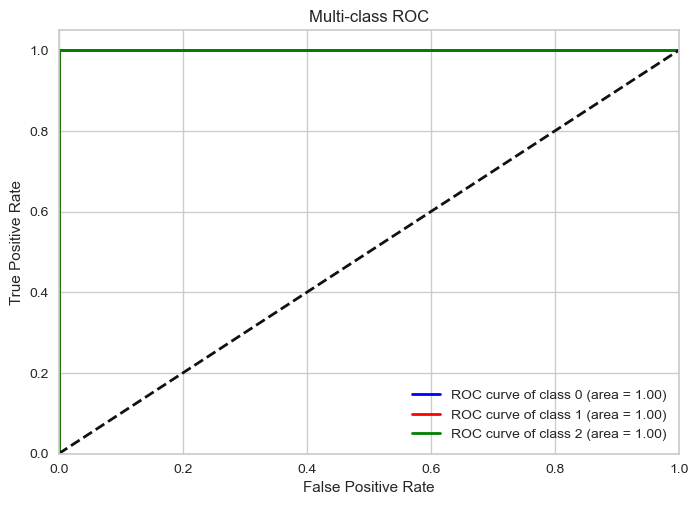

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

model.fit(X_train, y_train)

# Hedef değişkeni ikili formata dönüştürüyoruz
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Tahmin olasılıklarını alıyoruz
y_pred_proba = model.predict_proba(X_test)

# Her sınıf için ROC eğrisi ve AUC hesaplıyoruz
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çiziyoruz
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [56]:
column_trans.get_feature_names_out()

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

## Overfitting Risk and Features Importance in Decision Trees

DT, belli başlı özelliklere aşırı bağımlılık nedeniyle overfitting riski taşıyabilir.

DT, feature ların önemini belirlemek için ortalama sınıflandırma kazancına dayalı bir yöntem kullanır.

- **Örnek Durum**: Kanat uzunluğu ve gaga uzunluğu gibi özellikler, model için %90 oranında önemli olabilir.
- **Etkisi**: DT, datanın büyük bir kısmını ayırt edebilen bu tür önemli özelliklere aşırı bağımlı hale gelebilir ve diğer özellikleri önemsizleştirebilir. Bu, o özelliklerden elde edilebilecek içgörülerden mahrum kalınmasına neden olur.
- **Overfitting Riski**: Modelin karmaşıklığı arttığında overfitting riski de artar. Çok önemli birkaç özelliğe aşırı bağımlılık, modelin genelleştirilebilirliğini azaltır ve overfitting'e yol açabilir.

Bu durum, modelin veri setindeki tüm özellikleri dengeli bir şekilde değerlendirmesi ve overfittingten kaçınması gerektiğinin altını çizer. Özellikle, modelin sadece birkaç özelliğe dayanarak kararlar almasının, genel performans üzerinde olumsuz etkileri olabilir. Bu nedenle, model oluştururken dengeli bir özellik seçimi ve karmaşıklık kontrolü önemlidir.


**Feature Importance Hesaplama Yöntemi**
1. **Tree Oluşturma**: Veri üzerinde bir decision tree oluşturulur. Her düğümde, en iyi bölünmeyi sağlayan feature seçilir. Bölünme Gini impurity, entropy veya MSE (regresyonda) gibi metriklerle belirlenir.
2. **Özellik Kazancının Hesaplanması**: Her bölünme için, bölünmeden önceki ve sonraki saflık (veya varyans) değeri arasındaki fark hesaplanır. Bu fark, bölünmenin etkinliğini gösterir.
3. **Ortalama Kazancın Hesaplanması**: Bir feature, ağacın farklı düğümlerinde birden fazla kez kullanılabilir. Tüm kazanç değerlerinin ortalaması alınır.
4. **Normalleştirme**: Hesaplanan ortalama kazanç değerleri, tüm fetaureler için toplam kazanç değerine bölünerek normalize edilir.

**Sonuç**
- Elde edilen "feature importance" değerleri, her özelliğin modeldeki önemini gösterir.
- Scikit-learn'deki DecisionTreeClassifier veya DecisionTreeRegressor modelleri, *feature_importances_* özelliği ile bu değerleri sunar.

Bu değerler, modelin kararlarındaki anahtar özellikleri belirlemek ve özellikler arasında karşılaştırma yapmak için kullanılabilir.

In [57]:
cat

Index(['island', 'sex'], dtype='object')

In [58]:
pipe_model["DT_model"].feature_importances_ # DT_model.feature_importances_


array([0.03642845, 0.0319712 , 0.34285687, 0.06856954, 0.51430167,
       0.00587226])

In [59]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features


array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [60]:
X_train.head(1)

# Normalde datayı pipeline verdiğimiz df'in feature sıralaması aşağıda olduğu gibiydi.

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
293  Biscoe              46.5             14.8              217.0   

     body_mass_g     sex  
293       5200.0  FEMALE

In [61]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=features).head()


ordinalencoder__island  ordinalencoder__sex  remainder__culmen_length_mm  \
0                     0.0                  0.0                         46.5   
1                     1.0                  1.0                         54.2   
2                     1.0                  0.0                         45.6   
3                     1.0                  0.0                         46.2   
4                     1.0                  0.0                         38.1   

   remainder__culmen_depth_mm  remainder__flipper_length_mm  \
0                        14.8                         217.0   
1                        20.8                         201.0   
2                        19.4                         194.0   
3                        17.5                         187.0   
4                        17.6                         187.0   

   remainder__body_mass_g  
0                  5200.0  
1                  4300.0  
2                  3525.0  
3                  3650.0  
4                  3425.0

In [62]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

# featurların başındaki ön eklerden kurtuluyoruz.
# liste içerisinde sıralandırıyoruz ve bu sıralamayı new_features değişkenine atıyoruz.
# Feature importance sıralamasında bu feature sıralamasını kullanacağız.

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [63]:
df_fi = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_, index=new_features, #index=X.columns
                      columns = ["Feature Importance"])
df_fi = df_fi.sort_values("Feature Importance", ascending=False)

df_fi


Feature Importance
flipper_length_mm            0.514302
culmen_length_mm             0.342857
culmen_depth_mm              0.068570
island                       0.036428
sex                          0.031971
body_mass_g                  0.005872

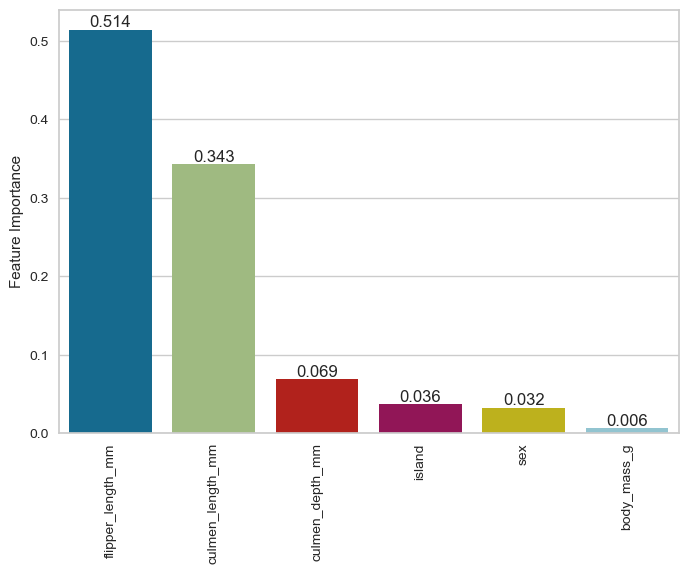

In [64]:
ax =sns.barplot(x = df_fi.index, y = 'Feature Importance', data = df_fi)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.show();

# feature importance değerlerini barplot ile görselleştiriyoruz. 
# Feature selection yaparken burdaki sıralamaya göre yapıyoruz.

In [65]:
X2 = X.drop(columns = ["flipper_length_mm"]) 

# en önemli feature drop edip X2 değişkenine atıyoruz.

In [66]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

# train ve test datalarını X2 datası üzerinden yapıyoruz. 

In [67]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

# yukarıda yaptığımız işlemleri tekrar ediyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

In [68]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)

# modele hata eklenmiş oldu

Test_Set
[[28  1  0]
 [ 1 18  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.95      0.95      0.95        19
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67


Train_Set
[[117   0   0]
 [  0  49   0]
 [  0   0 101]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        49
      Gentoo       1.00      1.00      1.00       101

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [69]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision_micro  \
1   0.010995    0.017154       1.000000             1.0              1.000000   
2   0.010087    0.017988       0.962963             1.0              0.962963   
3   0.019492    0.023006       0.962963             1.0              0.962963   
4   0.013052    0.099092       1.000000             1.0              1.000000   
5   0.072021    0.042486       1.000000             1.0              1.000000   
6   0.011622    0.037912       1.000000             1.0              1.000000   
7   0.013027    0.013178       1.000000             1.0              1.000000   
8   0.011984    0.021155       1.000000             1.0              1.000000   
9   0.016692    0.022906       0.923077             1.0              0.923077   
10  0.012100    0.025832       1.000000             1.0              1.000000   

    train_precision_micro  test_recall_micro  train_recall_micro  \
1                     1.0           1.000000                 1.0   
2                     1.0           0.962963                 1.0   
3                     1.0           0.962963                 1.0   
4                     1.0           1.000000                 1.0   
5                     1.0           1.000000                 1.0   
6                     1.0           1.000000                 1.0   
7                     1.0           1.000000                 1.0   
8                     1.0           1.000000                 1.0   
9                     1.0           0.923077                 1.0   
10                    1.0           1.000000                 1.0   

    test_f1_micro  train_f1_micro  
1        1.000000             1.0  
2        0.962963             1.0  
3        0.962963             1.0  
4        1.000000             1.0  
5        1.000000             1.0  
6        1.000000             1.0  
7        1.000000             1.0  
8        1.000000             1.0  
9        0.923077             1.0  
10       1.000000             1.0

In [70]:
df_scores.mean()[2:]

# en önemli feature ile CV sonrası 0.973789 scorlarını alırken şuan CV'den 0.9849 scorlarını alıyoruz.
# Gördüğünüz gibi CV'deki validation ve train dataları arasındaki variance da kapanmış oldu.

test_accuracy            0.9849
train_accuracy           1.0000
test_precision_micro     0.9849
train_precision_micro    1.0000
test_recall_micro        0.9849
train_recall_micro       1.0000
test_f1_micro            0.9849
train_f1_micro           1.0000
dtype: float64

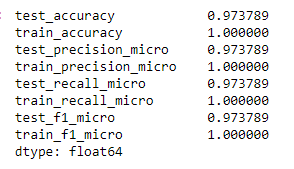

In [71]:
decision_tree_model = pipe_model2.named_steps["DT_model"]

feature_importances = decision_tree_model.feature_importances_

df2_fi = pd.DataFrame(data=feature_importances, index=X_train2.columns, columns=["Feature Importance"])

df2_fi = df2_fi.sort_values(by="Feature Importance", ascending=False)

df2_fi

Feature Importance
culmen_depth_mm             0.501557
island                      0.431050
body_mass_g                 0.057899
sex                         0.009494
culmen_length_mm            0.000000

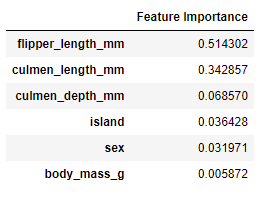

In [72]:
def get_feature_importances(model, features):
    feature_importances = model.feature_importances_
    
    df_feature_importances = pd.DataFrame(data=feature_importances, index=features, columns=["Feature Importance"])
    
    # Özellik önemlerine göre sıralayın
    df_feature_importances = df_feature_importances.sort_values(by="Feature Importance", ascending=False)
    
    return df_feature_importances

df_feature_importances_model2 = get_feature_importances(pipe_model2.named_steps["DT_model"], X_train2.columns)

df_feature_importances_model = get_feature_importances(pipe_model.named_steps["DT_model"], new_features)

print("Model 2 için Özellik Önemleri:")
print(df_feature_importances_model2)

print("\nModel 1 için Özellik Önemleri:")
print(df_feature_importances_model)

Model 2 için Özellik Önemleri:
                  Feature Importance
culmen_depth_mm             0.501557
island                      0.431050
body_mass_g                 0.057899
sex                         0.009494
culmen_length_mm            0.000000

Model 1 için Özellik Önemleri:
                   Feature Importance
flipper_length_mm            0.514302
culmen_length_mm             0.342857
culmen_depth_mm              0.068570
island                       0.036428
sex                          0.031971
body_mass_g                  0.005872


## Score Evaluation in Multiclass Datasets

Multiclass veri setlerinde, sınıfların precision, recall ve F1 skorlarını ayrı ayrı değerlendirmek için özel bir yaklaşım gereklidir.

**Manuel Skor Değerlendirme Yöntemi**

- **Amaç**: Multiclass veri setlerinde her sınıf için precision, recall ve F1 skorlarını ayrı ayrı hesaplamak.
- **Yaklaşım**: make_scorer fonksiyonu kullanılarak, özel bir skor değerlendirme fonksiyonu oluşturulur. Bu fonksiyon, belirli bir sınıf için skorları hesaplar.
- **Uygulama**: Özel skor değerlendirme fonksiyonu, modelin çapraz doğrulama (cross-validation) veya başka bir değerlendirme sürecinde kullanılır.
- **Sonuç**: Bu yöntem, multiclass veri setlerindeki her sınıfın model performansını daha detaylı bir şekilde anlamamıza yardımcı olur.

Bu yaklaşım, multiclass classification problemlerinde her sınıfın performansını ayrı ayrı değerlendirmek için kullanışlıdır. Özellikle, modelin her sınıfa yönelik precision ve recall yeteneğini anlamak için bu yöntem önemlidir.

In [73]:
from sklearn.metrics import make_scorer

#CV yi manuel olarak bütün sınıflara göre yapıp skor almak için

In [74]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }
# make_scorer fonksiyonu ile bütün classların ağırlıklandırılmış precision, recall ve f1_scorlarına bakıyoruz

In [75]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie        0.992308
train_precision-Adelie       1.000000
test_recall-Adelie           0.973485
train_recall-Adelie          1.000000
test_f1-Adelie               0.981652
train_f1-Adelie              1.000000
test_precision-Chinstrap     0.983333
train_precision-Chinstrap    1.000000
test_recall-Chinstrap        1.000000
train_recall-Chinstrap       1.000000
test_f1-Chinstrap            0.990909
train_f1-Chinstrap           1.000000
test_precision-Gentoo        0.983333
train_precision-Gentoo       1.000000
test_recall-Gentoo           0.990000
train_recall-Gentoo          1.000000
test_f1-Gentoo               0.985646
train_f1-Gentoo              1.000000
dtype: float64

## Visualize the Tree

In [76]:
from sklearn.tree import plot_tree

# DT hyper_parametrelerini daha iyi anlayabilmek maksadıyla ağaçları görselleşticeğiz.

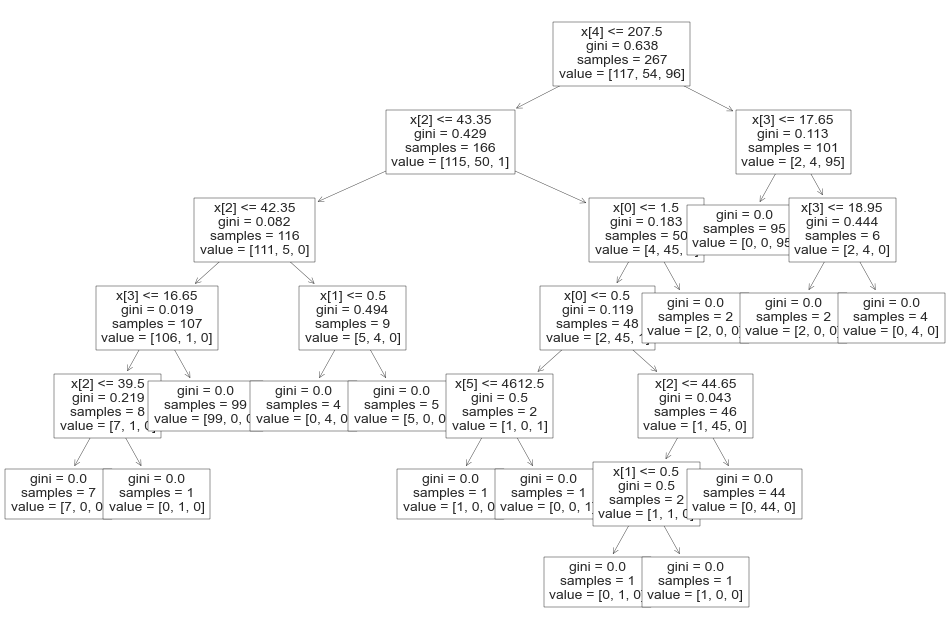

In [77]:
plt.figure(figsize = (12,8))

plot_tree(pipe_model["DT_model"], fontsize=10);

# plot_tree içerisine modeli verdiğimizde yaprak bölünmelerinin hangi featurların hangi değer aralıklarında 
# gerçekleştiğini bize gösteriyor. 
# Görselin daha iyi anlaşılabilmesi için feature isimlerini ve class isimlerini de tanımlamamız gerekiyor

In [78]:
X.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [79]:
new_features

# tree plot içerisinde pipe_model kullandığımızdan features names olarak yeni feature sıralaması kullnamamız gerektiğini
# unutmuyoruz.

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [80]:
pd.set_option('display.max_rows', 500)
X_train.flipper_length_mm.sort_values().unique()

array([172., 174., 176., 178., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 225., 226., 228., 229., 230., 231.])

In [81]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

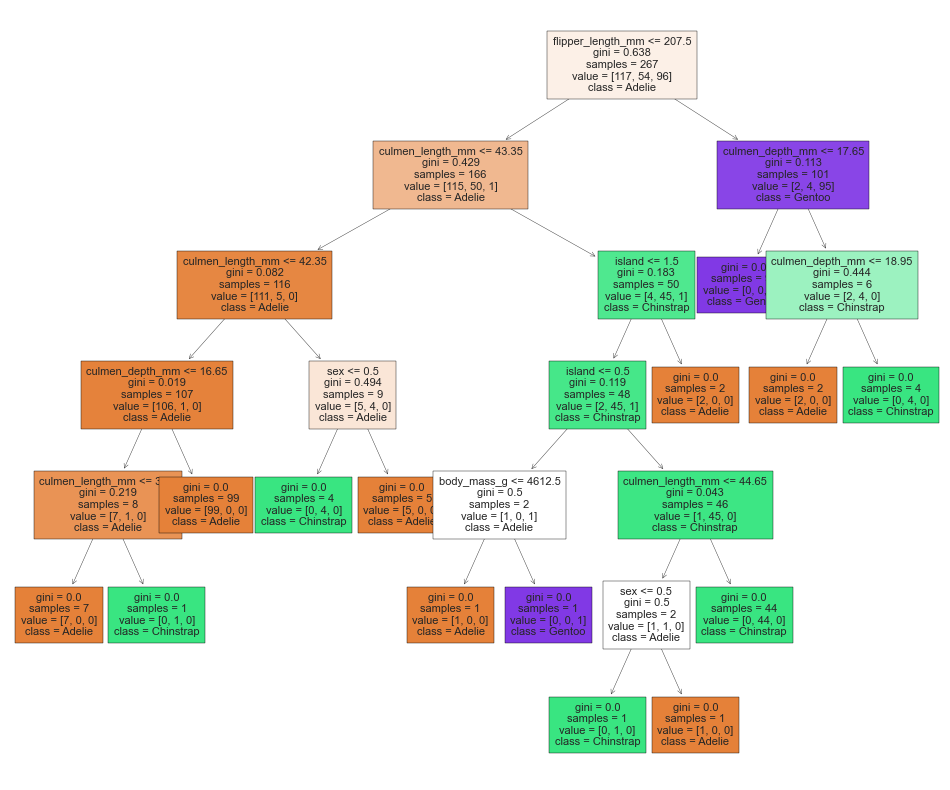

In [82]:
plt.figure(figsize=(12, 10), dpi=100)
plot_tree(pipe_model["DT_model"],
          filled=True,
          feature_names=new_features,
          class_names=y.unique().tolist(),
          fontsize=8)

# features_names ve class isimlerini tanımlayarak görseli daha okunaklı hale getirdik.
# pipe_model kullandığımızdan features names'in yeni feature sıralamasına göre olduğunu unutmuyoruz.

# gini değeri ne kadar düşükse o yaprakta benzer classa ait birçok gözlemin olduğunu gösterir.
# gini 0 ise o yapraktaki tüm gözlemler aynı classa ait olduğu gösterir.
# bir yapraktaki max gini değeri 1 - 1/n (n=class sayısı) olabilir. Bu datamız için max değer 1 - 1/3=0.67 olabilir.
# max gini değeri her classtan bol miktarda gözlem olduğunu gösterir.

# DT modelinde yaprakların bölünme şartı (splitter) default olarak en iyi (best) feature göre yapıldığından bu görselde
# ilk yaprak modelin tahminlemeye en fazla katkısı olan flipper_length_mm feature üzerinden gerçekleşiyor.
# ilk yapraktaki samples train datasındaki toplam gözlem sayısını, value ise classların alfabetik/numeric sırasına
# göre hangi classtan kaç gözlem olduğunu gösterir.

# Diğer yapraklardaki samples sayıları bölünme sonrasın da o yaprağa kaç gözlemin düştüğünü, value  ise
# hangi classtan kaç gözlem olduğunu gösterir.

# class ise o yaprağa düşen gözlemleri modelin hangi class'a atayacağını gösterir.

**Karar Ağacı Görselleştirmesi İçin Parametreler**

Karar ağacını görselleştirmek için Scikit-learn kütüphanesinde kullanılan çeşitli parametreler ve seçenekler:

**Parametreler ve Açıklamaları**
- **decision_tree**: Görselleştirilmek istenen karar ağacı nesnesi.
- **max_depth**: Ağaçtaki maksimum derinlik. Belirtilmezse tüm ağaç gösterilir.
- **feature_names**: Özelliklerin isimleri. Ağaç üzerinde gösterilen özelliklerin daha anlamlı isimleri olabilir.
- **class_names**: Hedef sınıfların isimleri. Ağacın sonunda veri noktalarının hangi sınıflara ait olduğunu gösterir.
- **label**: 'all', 'root', 'none' seçeneklerinden biri. Hangi düğüm etiketlerinin gösterileceğini belirtir.
- **filled**: Boolean değeri. True ise, düğümler sınıflara göre renklendirilir.
- **impurity**: Boolean değeri. True ise, düğümlerde saflık (genellikle Gini saflığı) gösterilir.
- **node_ids**: Boolean değeri. True ise, her düğüm için düğüm ID'leri gösterilir.
- **proportion**: Boolean değeri. True ise, her düğümdeki örneklerin oranı gösterilir.
- **rounded**: Boolean değeri. True ise, düğüm kutularının köşeleri yuvarlanır.
- **precision**: Noktadan sonraki basamak sayısı. Gösterilen ondalıklı değerlerin hassasiyetini ayarlar.
- **ax**: Matplotlib eksen nesnesi. Belirtilmezse mevcut eksen kullanılır veya yeni bir eksen oluşturulur.
- **fontsize**: Yazı tipi boyutu. Düğümlerdeki metnin boyutunu belirtir.

Bu parametreler, karar ağacının görselleştirilmesinde esneklik sağlar ve farklı veri setleri ve analiz ihtiyaçları için uyarlama imkanı sunar.

## Understanding and Evaluating Hyperparameters in Decision Trees

**Decision Tree'de kullanılan bazı önemli hiperparametreler ve bunların model üzerindeki etkisi:**

**Önemli Hiperparametreler**
- **max_depth**: Ağacın maksimum derinliği. Daha yüksek değerler, modelin daha karmaşık olmasına ve potansiyel olarak overfitting'e yol açabilir. None ayarı, hatasız ayrım yapılana kadar dallanmaya devam eder.
- **min_samples_split**: Bir düğümün bölünmesi için gereken minimum örnek sayısı. Daha yüksek değerler, bölünmeleri sınırlar ve modelin daha basit olmasını sağlar.
- **min_samples_leaf**: Bir yaprağın yaprak olarak kabul edilebilmesi için gerekli minimum gözlem sayısı. Daha yüksek değerler, ağacın daha az detaylı olmasını sağlar.
- **criterion**: Karar ağacını bölerken kullanılan fonksiyon ('gini' veya 'entropy').
- **splitter**: Bölünme yöntemi ('best' veya 'random').
- **max_features**: Her bölünmede dikkate alınacak maksimum özellik sayısı.
- **max_leaf_nodes**: Maksimum yaprak düğüm sayısı.
- **min_impurity_decrease**: Bir düğümü bölmek için gerekli minimum saflık azalması.
- **class_weight**: Sınıfların ağırlıkları.

Bu hiperparametreler, modelin karmaşıklığını, ayrıntı düzeyini ve genelleştirme yeteneğini etkiler. 

Özellikle, max_depth, min_samples_split, ve min_samples_leaf hiperparametreleri, modelin eğitim ve test veri setleri arasındaki uyumu etkileyerek overfitting riskini yönetmeye yardımcı olur. 

Genellikle, bu parametrelerin grid search yoluyla en uygun değerlerinin belirlenmesi önerilir.

**Model Değerlendirme Süreci**
- **Model Hazırlama**: Karar ağacı modeli hazırlanır ve belirlenen hiperparametrelerle eğitilir.
- **Tahmin Yapma**: Hem eğitim hem de test veri setlerinden tahminler alınır.

**Değerlendirme Metrikleri**
- **Confusion Matrix**: Modelin performansını sınıf bazında gösterir.
- **Classification Report**: Precision, recall, F1-score gibi metriklerle modelin genel performansını değerlendirir.

**Karar Ağacının Görselleştirilmesi**
 - Modelin nasıl kararlar verdiğini anlamak için karar ağacı görselleştirilir.

Bu süreç, karar ağacı modellerinin performansını anlamak ve hiperparametrelerin model üzerindeki etkisini değerlendirmek için önemlidir. Ayrıca, modelin hem eğitim hem de test veri setlerinde nasıl performans gösterdiğini kapsamlı bir şekilde analiz etmeye olanak tanır.

In [83]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"], filled=True, feature_names=new_features, class_names = y.unique().tolist(), fontsize=10);
    #feature_names=X.columns

# report_model fonksiyonu ile test ve train datası scorlarını karşılaştırıp sonrada DT hyper parametlerinin
# ağaçlarda nasıl değişiklikler yaptığı gözlemleyebilmek için ağaçları görselleştireceğiz.

### max_depth & Pruned Tree

**max_depth**
- **Amaç**: Ağacın ne kadar derinliğe ineceğini belirler. Örneğin, *max_depth=2* iki katmana ayrılmasını sağlar.
- **Etkisi**:
  - *max_depth=None:* Ağacın, train setinde hiç hata yapmadan en mükemmele kadar ayrım yapmasını sağlar. Son noktaya kadar gider ve bu durum overfitting riskini artırabilir.
  - Bu parametre, train setinde hata (bias) ekleyerek test setinin performansını iyileştirmek için kullanılabilir.

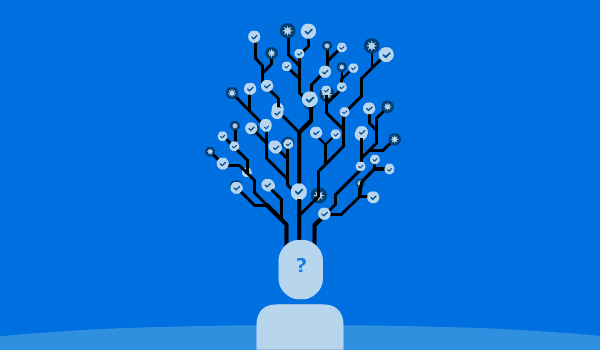

In [84]:
DT_model = DecisionTreeClassifier(max_depth=3, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=3, random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  5  49   0]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97       117
   Chinstrap       0.94      0.91      0.92        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.97       267
   macro avg       0.97      0.96      0.96       267
weighted avg       0.97      0.97      0.97       267



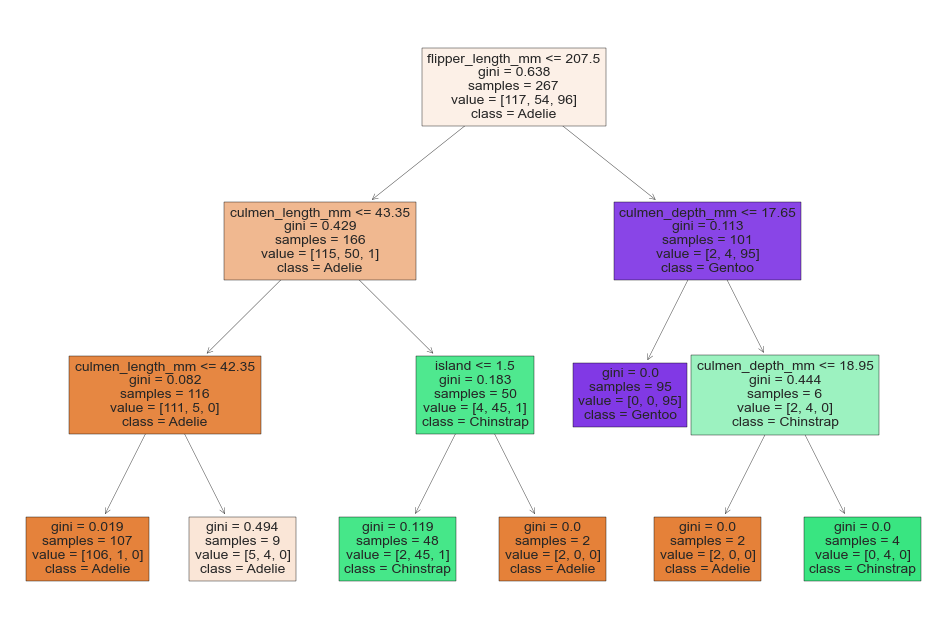

In [85]:
report_model(pruned_tree)

# max_depth bölünmenin ne kadar derine ineceğini gösterir.

# Overfitingi engellemek için kullanılan en önemli parametre max_deptdir.

# max_depth default None'dır yani tüm yapraklar pure olana kadar(gini/entropy 0 olması) dallanmaya devam eder. 

In [86]:
DT_model = DecisionTreeClassifier(max_depth=2, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree2 = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree2.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=2, random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[111   6   0]
 [  5  49   0]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       117
   Chinstrap       0.88      0.91      0.89        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.96       267
   macro avg       0.94      0.95      0.95       267
weighted avg       0.96      0.96      0.96       267



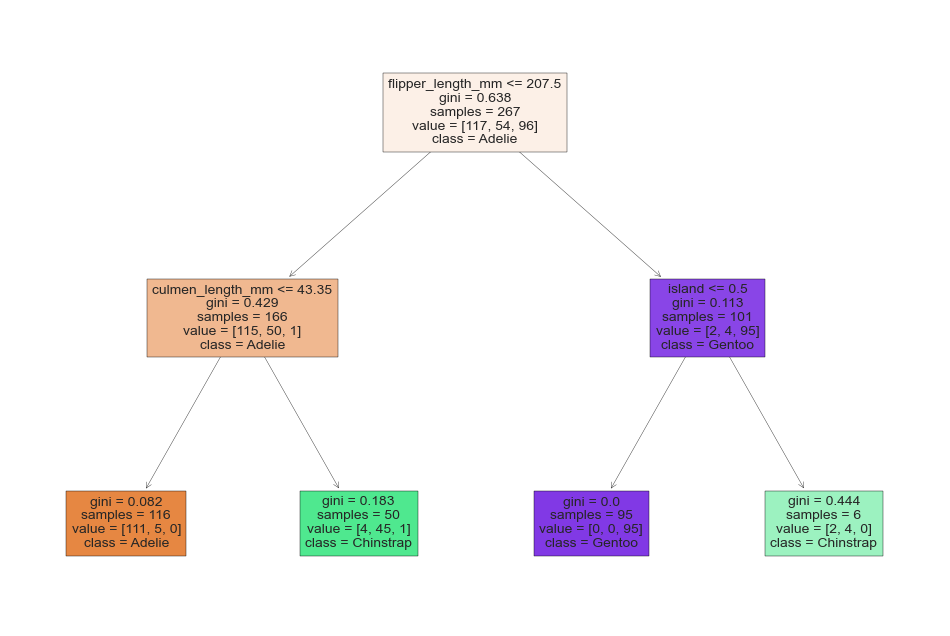

In [87]:
report_model(pruned_tree2)

### min_samples_split

Karar ağaçlarında *min_samples_split* hiperparametresi, bir düğümün bölünmesi için gereken minimum örnek sayısını belirler.

**Min Samples Split'in Etkisi**
- **Amaç**: Bir düğümün bölünebilmesi için gerekli minimum örnek sayısını ayarlamak.
- **Etkisi**: Bu parametre, ağacın dallanma yoğunluğunu kontrol eder. Daha yüksek *min_samples_split* değerleri, daha az dallanmaya ve dolayısıyla daha basit bir modele yol açar.
- **Kullanımı**: Modelin karmaşıklığını ve ayrıntı düzeyini azaltarak overfitting riskini düşürmek için kullanılır.
- **Uygulama Alanları**: Özellikle büyük veri setlerinde veya aşırı dallanma ve aşırı uyum (overfitting) riski taşıyan durumlarda, *min_samples_split* parametresinin artırılması yararlı olabilir.

*min_samples_split* parametresi, modelin genelleştirme yeteneğini artırmak ve veri setindeki küçük varyasyonlardan etkilenmemesini sağlamak için önemlidir. 

Bu parametre, özellikle karar ağacının eğitim veri setindeki gürültüye veya küçük değişikliklere aşırı duyarlı hale gelmesini önlemek için kullanılır.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 1  0 23]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  6  48   0]
 [  1   0  95]]


              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96       117
   Chinstrap       0.96      0.89      0.92        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.97       267
   macro avg       0.97      0.95      0.96       267
weighted avg       0.97      0.97      0.97       267



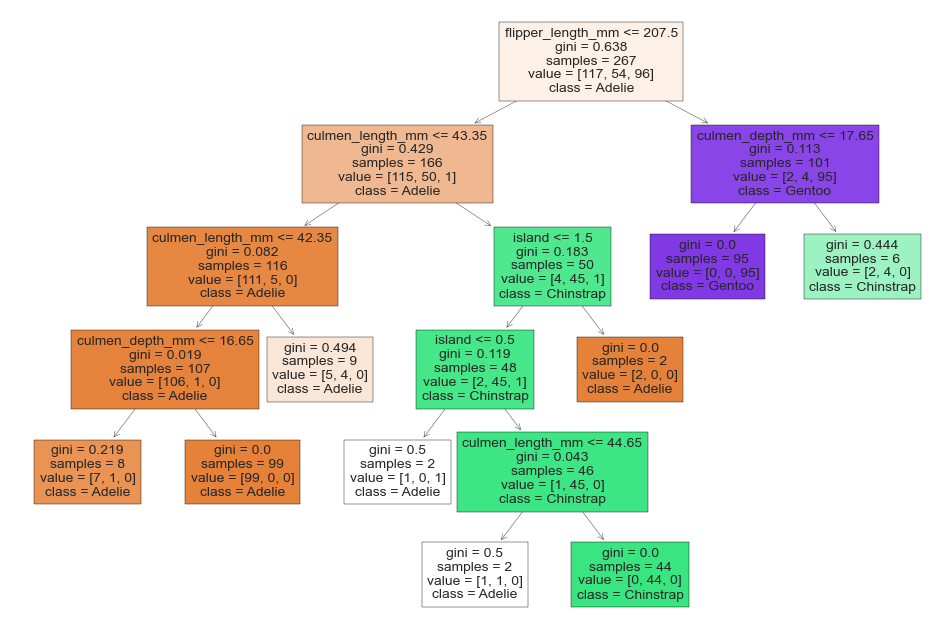

In [88]:
DT_model = DecisionTreeClassifier(min_samples_split=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)

# min samples split bir yaprağın bölünmeye devam edebilmesi için o yaprakta bulunması gereken 
# minimum gözlem sayısını gösterir.
# default değeri 2'dir.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 1  0 23]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  1  53   0]
 [  1   0  95]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98       117
   Chinstrap       0.96      0.98      0.97        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.99       267
   macro avg       0.98      0.98      0.98       267
weighted avg       0.99      0.99      0.99       267



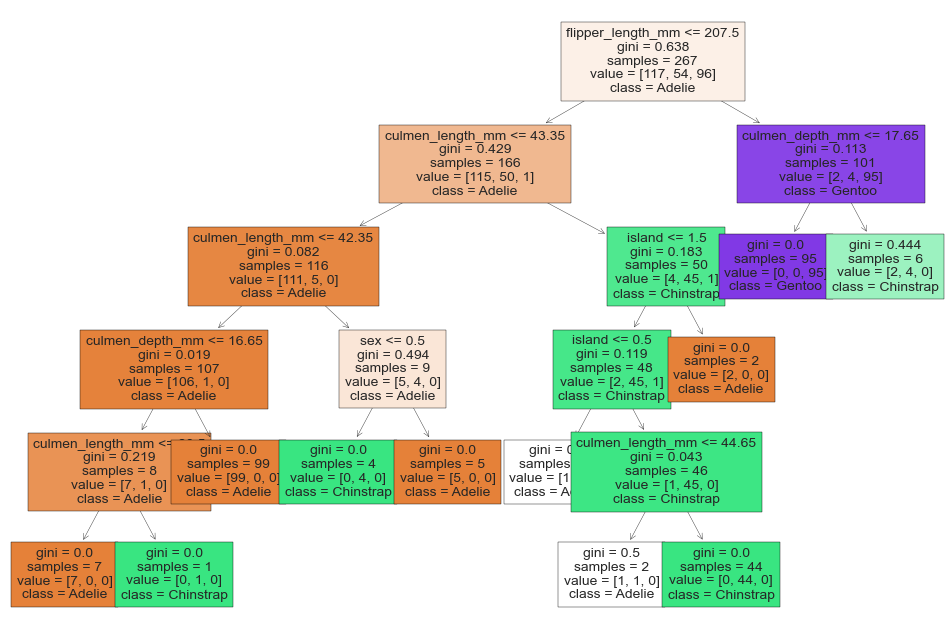

In [89]:
DT_model = DecisionTreeClassifier(min_samples_split=7, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)

#7 gözlem varsa bölmeye devam eder

### min_samples_leaf
- **Amaç**: Bir yaprağın yaprak olarak kabul edilebilmesi için gereken minimum gözlem sayısını belirler.
- **Etkisi**: Ağacın ayrıntı düzeyini kontrol eder ve daha genel bir model oluşturulmasına yardımcı olur. Daha yüksek *min_samples_leaf* değerleri, modelin daha az detaylı ve daha genel olmasını sağlar. Aşırı dallanmayı ve overfitting engeller.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[111   4   2]
 [  5  45   4]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       117
   Chinstrap       0.90      0.83      0.87        54
      Gentoo       0.94      0.99      0.96        96

    accuracy                           0.94       267
   macro avg       0.93      0.92      0.93       267
weighted avg       0.94      0.94      0.94       267



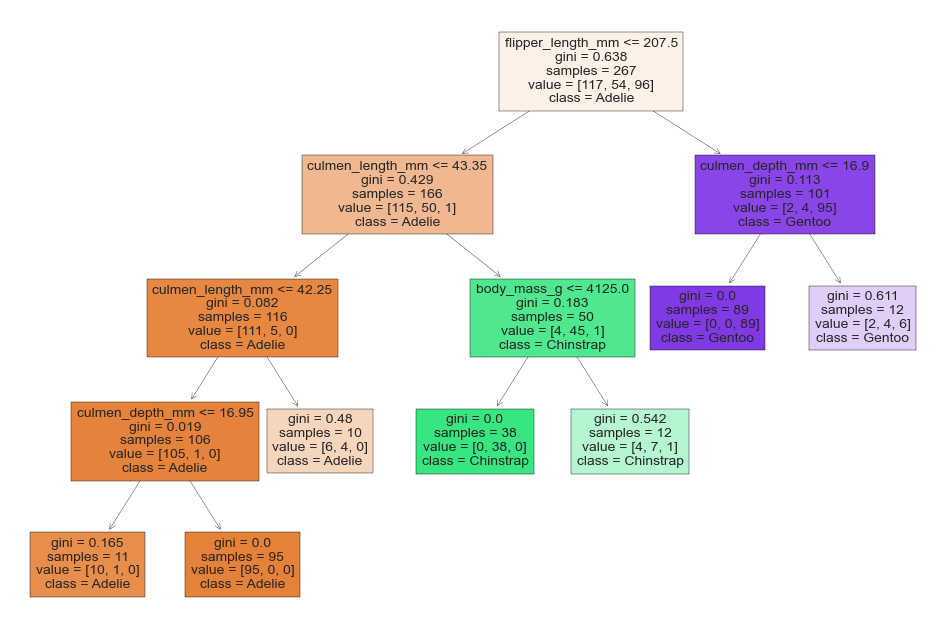

In [90]:
DT_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)

# min samples leaf bir yaprağın model tarafından yaprak olarak kabul edilebilmesi için o yaprakta bulunması gereken
# minimum gözlem sayısını gösterir. 

# defaul değeri 1'dir.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 1  0 23]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  6  48   0]
 [  1   0  95]]


              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96       117
   Chinstrap       0.96      0.89      0.92        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.97       267
   macro avg       0.97      0.95      0.96       267
weighted avg       0.97      0.97      0.97       267



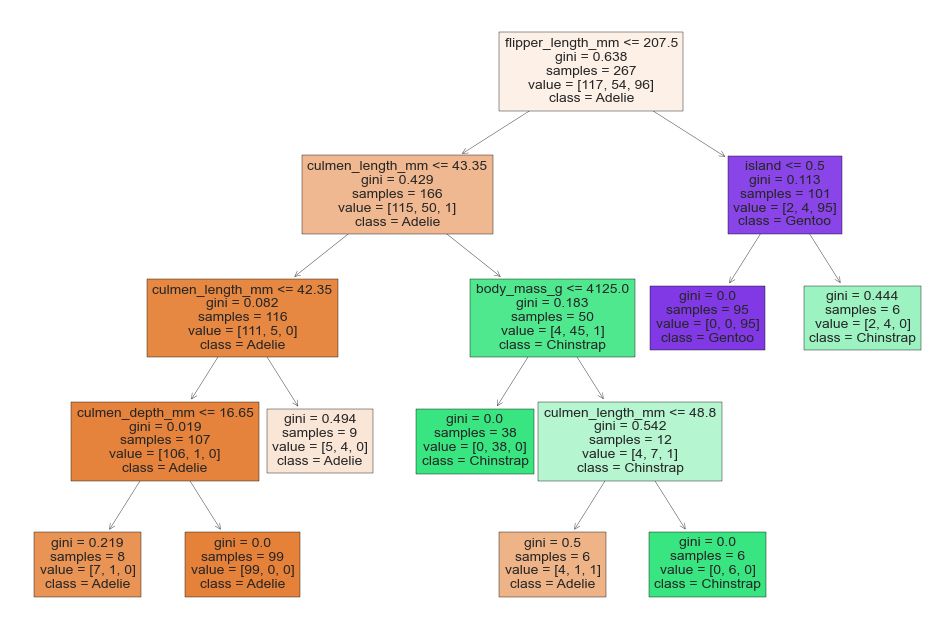

In [91]:
DT_model = DecisionTreeClassifier(min_samples_leaf=5, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations) 
tree.fit(X_train,y_train)

report_model(tree)



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[113   4   0]
 [  1  53   0]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.99      0.97      0.98       117
   Chinstrap       0.91      0.98      0.95        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.98       267
   macro avg       0.97      0.98      0.97       267
weighted avg       0.98      0.98      0.98       267



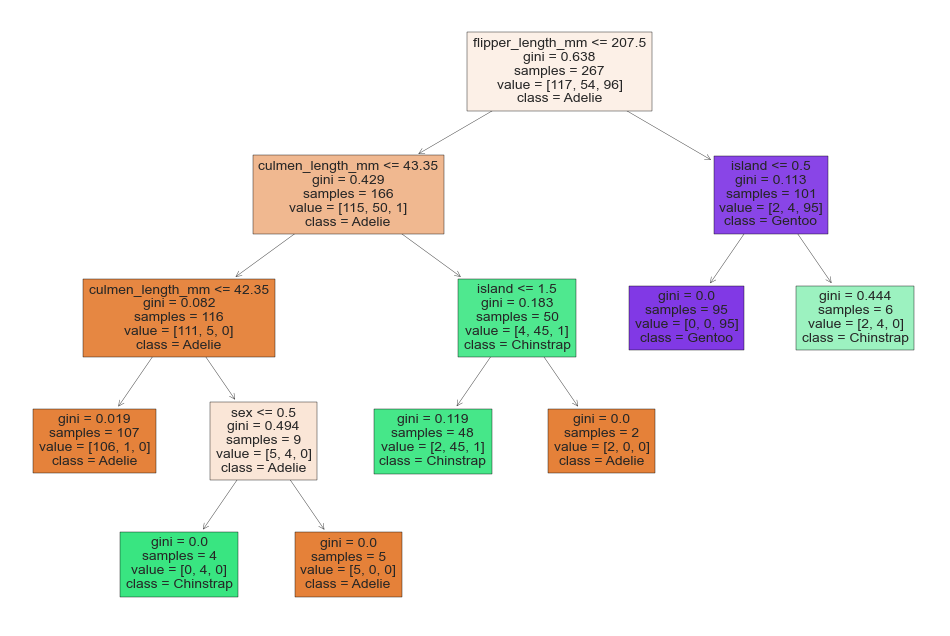

In [92]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)
tree.fit(X_train,y_train)

report_model(tree)

# Max Leaf Nodes yaprakların bölünmesi sonucunda elde edebileceğimiz max yaprak sayısını sınırlandırabiliyoruz.
# Bu parametre de overfitigi engellemek için kullanıyoruz. 
# Ancak bu parametreyi özellikle çok büyük datalarda düzenleyebilmek çok zordur.

# Default değeri None'dır. Modelin ulaşabileceği Max yapraklanmaya izin verir.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[111   6   0]
 [  5  49   0]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       117
   Chinstrap       0.88      0.91      0.89        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.96       267
   macro avg       0.94      0.95      0.95       267
weighted avg       0.96      0.96      0.96       267



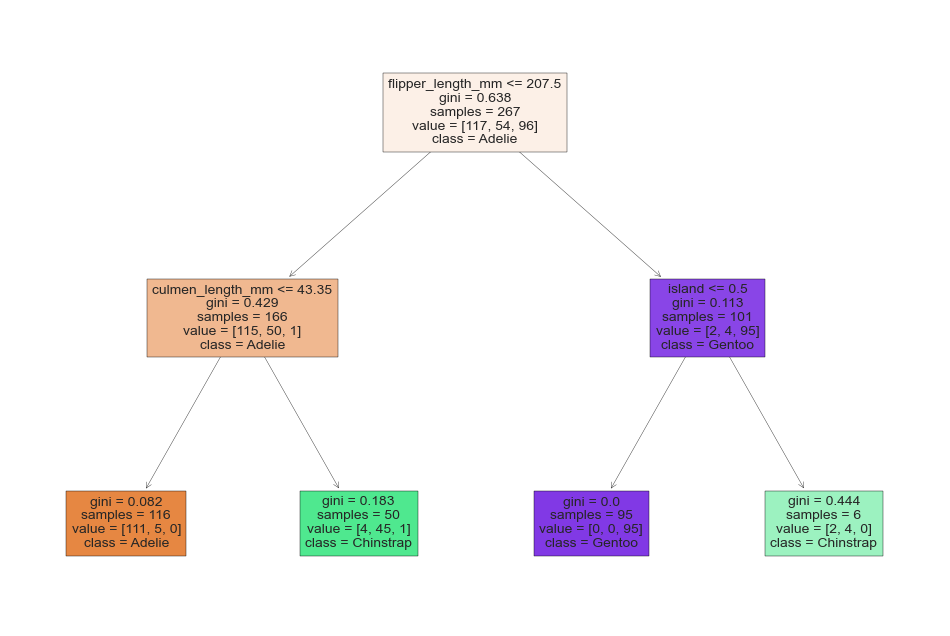

In [93]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=4, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)
tree.fit(X_train,y_train)

report_model(tree)

### splitter 

- **Amaç**: Karar ağacı modelinde her düğümde bölünmeyi nasıl seçeceğini belirler.
- **Seçenekler**:
  - 'best': Her düğümde en iyi bölünmeyi seçer.
  - 'random': Rastgele bir bölünme seçer.
- **Etkisi**: 'random' seçeneği, modelin rastgeleliğini artırarak overfitting riskini azaltabilir.



Test Set
[[28  1  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



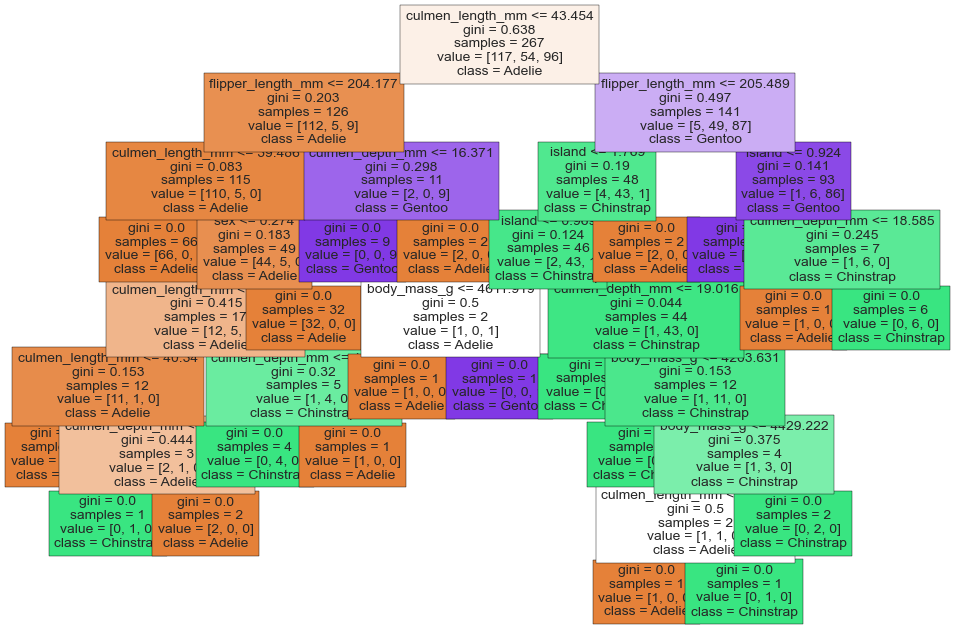

In [94]:
DT_model = DecisionTreeClassifier(splitter = "random")
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

# splitter, modelin ilk dallanma dahil sonrasındaki tüm dallanmalarda kullanılacak featureların nasıl seçileceğine
# karar verir.
# splitter "best" veya "random" olabilir. 

# Eğer splitter "best" ise;
# 1. her dallanma için en iyi class ayrımını yapan feature kullanılır. 
# "random" ise model tarafından rastgele seçilen herhangi bir featuran kullanılacağı anlamına gelir.

# 2. Tüm featurelara if/else sorusu sorduktan sonra en iyi class ayrımını bize veren feature best featuredır. 
# Ve her aşamadaki bölünme işlemleri best featurelera göre yapılır.

# Her Bölünme işlemi için tüm featurelara if/else soruları tekrar sorulduğundan her bölünme işleminde 
# aynı featurlar tekrar tekrar kullanılabilir.

# Eğer splitter "random" seçersek model her bölünme aşamasında rastgele bir feature seçer ve o feature üzerinden en iyi 
# classlamayı elde etmeye çalışır.Ancak, Random çok fazla dallanmaya sebep olur.

# Bölünme işlemlerinde best featuren kullanılması modelin tüm featurelardan insight elde etmesine engel olduğundan
# DT modelinden elde ettiğimiz feature importancelar bize gerçekci sonuçlar vermeye bilir. 
# Ancak splitter random kullanırsak model tüm featurlardan insightlar elde ettiğinden feature importance 
# daha güvenilir olur. 

#Tree based modellerde en güvenilir feeature importance sonuçlarını random forest ve xgboost modellerinden elde ederiz.

# defaltu best'dir.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



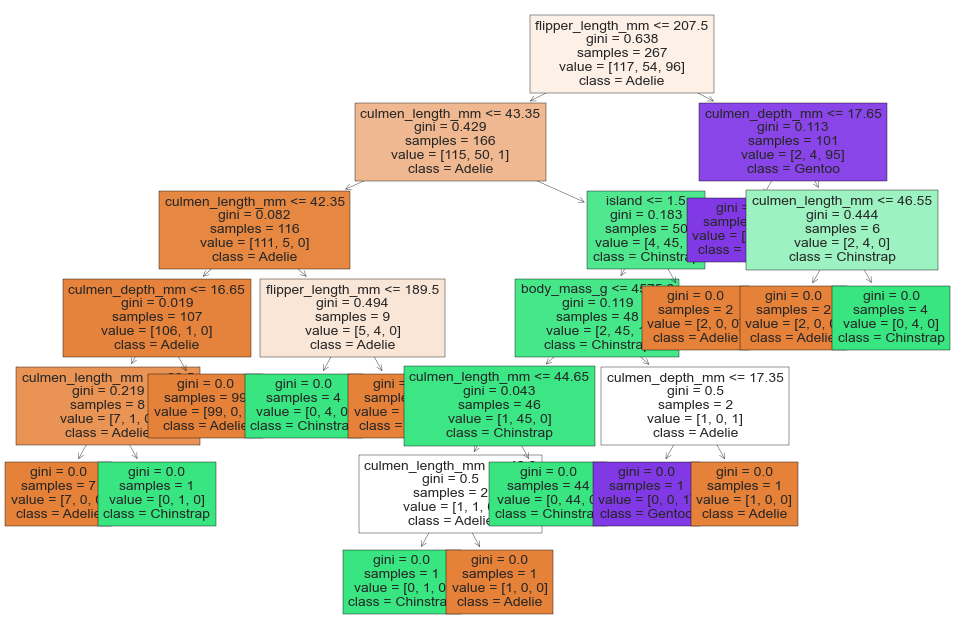

In [95]:
DT_model = DecisionTreeClassifier()
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

### max_features 

- **Amaç**: Her bölünmede dikkate alınacak maksimum özellik (feature) sayısını belirler.
- **Seçenekler**: 'auto', 'sqrt', 'log2' veya bir tam sayı.
- **Etkisi**: Bu parametre, modelin hangi özellikleri dikkate alacağını sınırlayarak ağacın çeşitliliğini ve genelleştirme yeteneğini etkiler.



Test Set
[[28  1  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



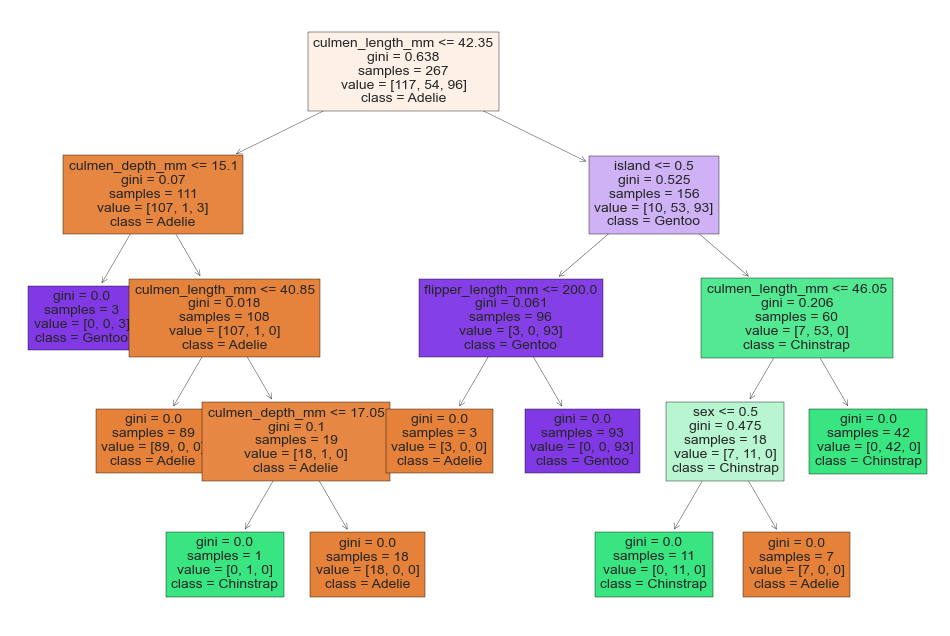

In [96]:
DT_model = DecisionTreeClassifier(splitter='best', max_features=3)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

# max_features modelin tüm featurlardan insight elde edebilmesi için yaprakların dallanmasına getirilen bir kısıtlamadır.
# max_features default değeri None'dır. Yani yaprak bölünmelerinde kullanılacak best featurı veya random featurı datamızda
# bulunan tüm featurlar içerisinden seç anlamına geliyor.

# Eğer max_feature ile bu seçime bir sınırlandırma getirirsek ne olur peki? Max_features =3 üzerinden konuşacak olursak;
# Eğer splitter="best" ise yaprakların bölünme aşamasında kullanılacak best feature datamızdaki tüm featurlar içerisinden değil
# modelin rastgele seçtiği 3 feature içerisinden best olan feature seçilirek bölünme bu feature üzerinden yapılır ve bu işlem
# her bölünme aşamasında tekrarlanır.

# Eğer splitter="random" ise yaprakların bölünme aşamasında kullanılacak random feature datamızdaki tüm featurlar içerisinden 
# değil modelin rastgele seçtiği 3 feature içerisinden rastgele bir feature seçilirek bölünme bu feature üzerinden yapılır ve
# bu işlem her bölünme aşamasında tekrarlanır

# Gördüğünüz gibi max_feature ile modelin bölünme işlemlerine bir rassallık katıyoruz. Bu şekilde modelin datadaki tüm
# featurlardan insightlar elde ederek daha doğru bir feature importance elde etmeye çalışıyoruz.

# max_featuresin defaultu None'dır. Yani df'deki tüm featurları kullanır.



Test Set
[[28  1  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



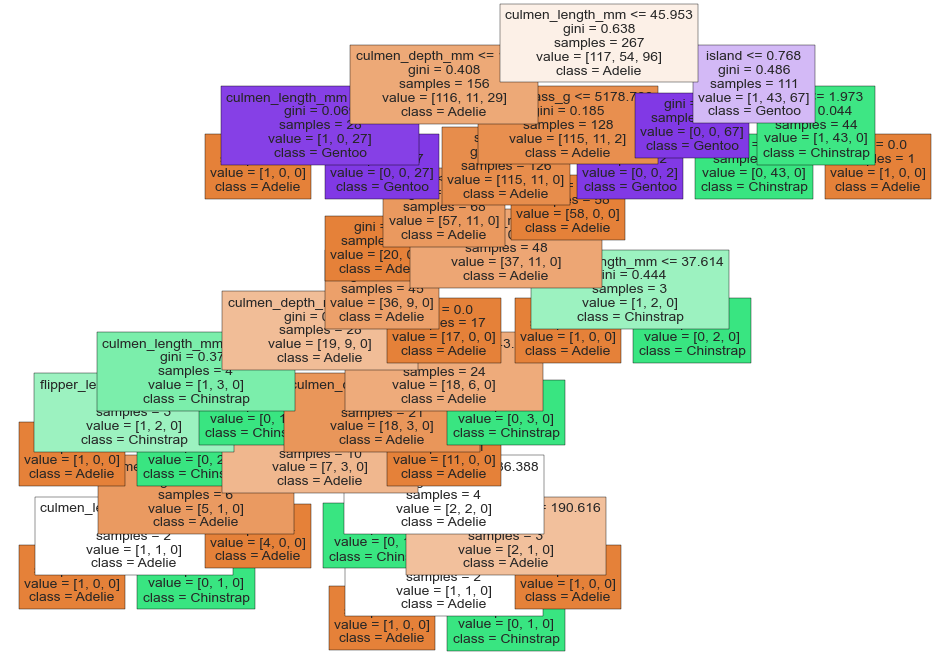

In [97]:
DT_model = DecisionTreeClassifier(splitter='random', max_features=3)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

### criterion 

- **Amaç**: Karar ağacını bölerken kullanılan fonksiyonu belirler.
- **Seçenekler**:
  - 'gini': Gini saflığına dayalı bölünme.
  - 'entropy': Bilgi kazancına dayalı bölünme.
- **Etkisi**: Seçilen kriter, modelin veri setini nasıl böleceğini ve kararlarını nasıl vereceğini etkiler.




Test Set
[[28  1  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



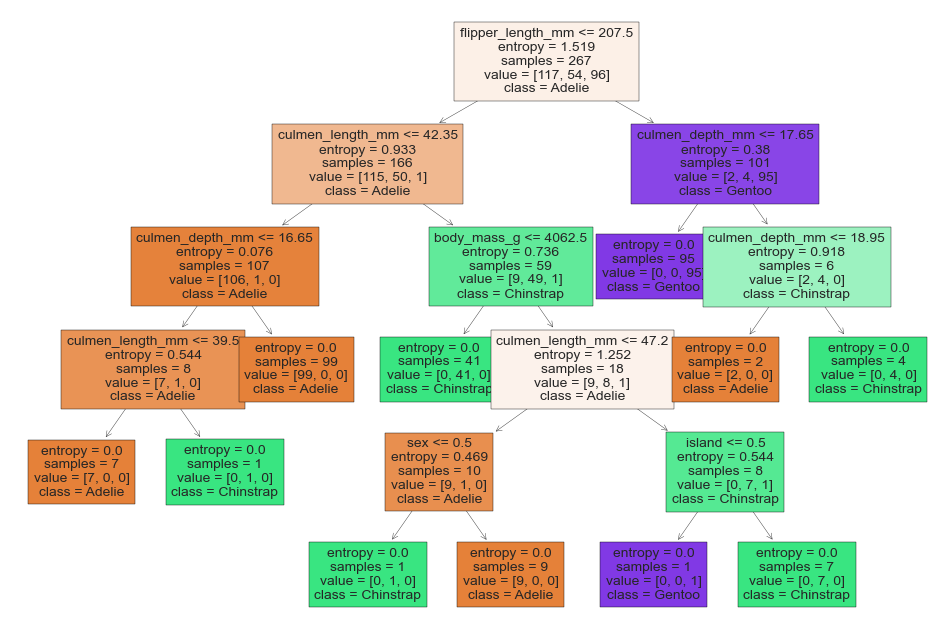

In [98]:
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

report_model(entropy_tree)

# Bölünme kriteri için gini veya entropy değrlerinden hangisini dikkate alması gerektiğini belirtiyoruz. 
# 2'sinide kullanabiliriz. Moddele herhangi bir kısıtlama getirmezsek gini veya entropy değeri 0 olana kadar bölünmeye devam
# eder.
# entropy min 0 değeri alırken maximum log2(n) (n:class sayısı). Bizim datamız için max entropy değeri log2(3) = 1.585

# defaultu gini'dir.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



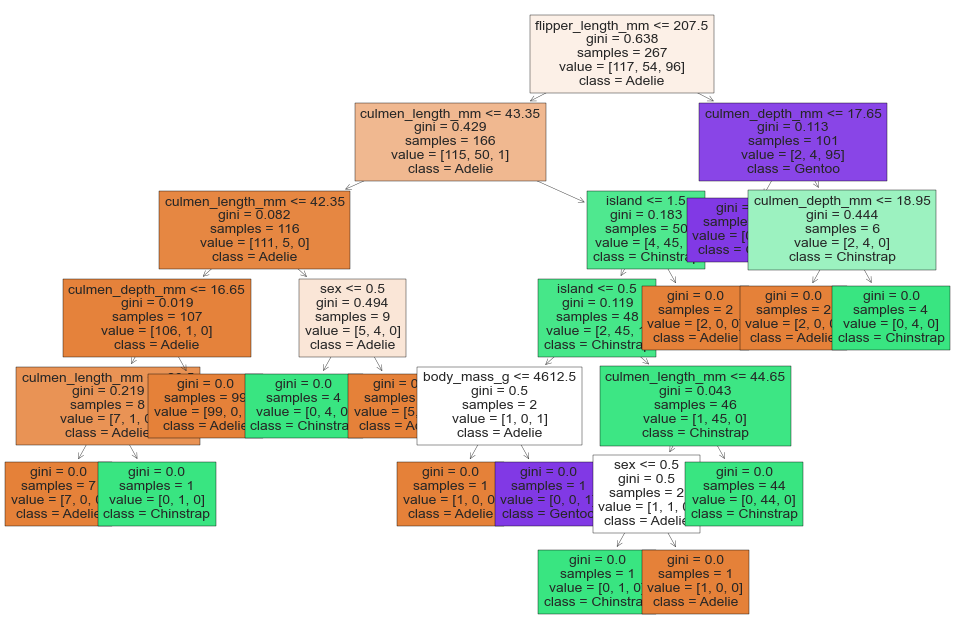

In [99]:
DT_model = DecisionTreeClassifier(criterion='gini', random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

report_model(entropy_tree)

## Find Best Parameters

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

In [102]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 4,5,6, 7],
              "DT_model__max_depth": [None, 2, 3, 4],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

# en iyi hyper_parametreleri bulmaya çalışıyoruz.

In [103]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# en iyi f1_micro skorunu döndürecek hyper_parametreleri bulmasını isityoruz.

In [104]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [105]:
grid_model.best_index_

493

In [106]:
pd.DataFrame(grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.981054
mean_train_score    0.996255
Name: 12, dtype: object

In [107]:
grid_model.best_score_

0.9961538461538462

In [108]:
grid_model.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': 4,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 3,
 'DT_model__splitter': 'random'}

In [109]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_features=4, min_samples_split=3,
                                        random_state=101, splitter='random'))])

In [110]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[27  1  1]
 [ 1 18  0]
 [ 1  0 18]]
              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        29
   Chinstrap       0.95      0.95      0.95        19
      Gentoo       0.95      0.95      0.95        19

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67


Train_Set
[[117   0   0]
 [  0  49   0]
 [  0   0 101]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        49
      Gentoo       1.00      1.00      1.00       101

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [111]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [112]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeClassifier(max_features=4,
                                      min_samples_split=3,
                                      random_state=101,
                                      splitter='random'))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.996154
train_accuracy           0.999170
test_precision_micro     0.996154
train_precision_micro    0.999170
test_recall_micro        0.996154
train_recall_micro       0.999170
test_f1_micro            0.996154
train_f1_micro           0.999170
dtype: float64

# Final Model & Prediction

In [113]:
X = df.drop(columns=["species", "flipper_length_mm"])
y = df['species']

In [114]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))]

pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X, y)

# bulduğumuz en iyi hyper parametreler ile tüm data için modeli yeniden kuruyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

In [115]:
X.head()

island  culmen_length_mm  culmen_depth_mm  body_mass_g     sex
0  Torgersen              39.1             18.7       3750.0    MALE
1  Torgersen              39.5             17.4       3800.0  FEMALE
2  Torgersen              40.3             18.0       3250.0  FEMALE
4  Torgersen              36.7             19.3       3450.0  FEMALE
5  Torgersen              39.3             20.6       3650.0    MALE

In [116]:
pd.DataFrame(column_trans.fit_transform(X))

# df'in feature sıralamasının değiştiğini tekrar gözlemledik

0    1     2     3       4
0    2.0  1.0  39.1  18.7  3750.0
1    2.0  0.0  39.5  17.4  3800.0
2    2.0  0.0  40.3  18.0  3250.0
3    2.0  0.0  36.7  19.3  3450.0
4    2.0  1.0  39.3  20.6  3650.0
5    2.0  0.0  38.9  17.8  3625.0
6    2.0  1.0  39.2  19.6  4675.0
7    2.0  0.0  41.1  17.6  3200.0
8    2.0  1.0  38.6  21.2  3800.0
9    2.0  1.0  34.6  21.1  4400.0
10   2.0  0.0  36.6  17.8  3700.0
11   2.0  0.0  38.7  19.0  3450.0
12   2.0  1.0  42.5  20.7  4500.0
13   2.0  0.0  34.4  18.4  3325.0
14   2.0  1.0  46.0  21.5  4200.0
15   0.0  0.0  37.8  18.3  3400.0
16   0.0  1.0  37.7  18.7  3600.0
17   0.0  0.0  35.9  19.2  3800.0
18   0.0  1.0  38.2  18.1  3950.0
19   0.0  1.0  38.8  17.2  3800.0
20   0.0  0.0  35.3  18.9  3800.0
21   0.0  1.0  40.6  18.6  3550.0
22   0.0  0.0  40.5  17.9  3200.0
23   0.0  0.0  37.9  18.6  3150.0
24   0.0  1.0  40.5  18.9  3950.0
25   1.0  0.0  39.5  16.7  3250.0
26   1.0  1.0  37.2  18.1  3900.0
27   1.0  0.0  39.5  17.8  3300.0
28   1.0  1.0  40.9  18.9  3900.0
29   1.0  0.0  36.4  17.0  3325.0
30   1.0  1.0  39.2  21.1  4150.0
31   1.0  1.0  38.8  20.0  3950.0
32   1.0  0.0  42.2  18.5  3550.0
33   1.0  0.0  37.6  19.3  3300.0
34   1.0  1.0  39.8  19.1  4650.0
35   1.0  0.0  36.5  18.0  3150.0
36   1.0  1.0  40.8  18.4  3900.0
37   1.0  0.0  36.0  18.5  3100.0
38   1.0  1.0  44.1  19.7  4400.0
39   1.0  0.0  37.0  16.9  3000.0
40   1.0  1.0  39.6  18.8  4600.0
41   1.0  1.0  41.1  19.0  3425.0
42   1.0  0.0  36.0  17.9  3450.0
43   1.0  1.0  42.3  21.2  4150.0
44   0.0  0.0  39.6  17.7  3500.0
45   0.0  1.0  40.1  18.9  4300.0
46   0.0  0.0  35.0  17.9  3450.0
47   0.0  1.0  42.0  19.5  4050.0
48   0.0  0.0  34.5  18.1  2900.0
49   0.0  1.0  41.4  18.6  3700.0
50   0.0  0.0  39.0  17.5  3550.0
51   0.0  1.0  40.6  18.8  3800.0
52   0.0  0.0  36.5  16.6  2850.0
53   0.0  1.0  37.6  19.1  3750.0
54   0.0  0.0  35.7  16.9  3150.0
55   0.0  1.0  41.3  21.1  4400.0
56   0.0  0.0  37.6  17.0  3600.0
57   0.0  1.0  41.1  18.2  4050.0
58   0.0  0.0  36.4  17.1  2850.0
59   0.0  1.0  41.6  18.0  3950.0
60   0.0  0.0  35.5  16.2  3350.0
61   0.0  1.0  41.1  19.1  4100.0
62   2.0  0.0  35.9  16.6  3050.0
63   2.0  1.0  41.8  19.4  4450.0
64   2.0  0.0  33.5  19.0  3600.0
65   2.0  1.0  39.7  18.4  3900.0
66   2.0  0.0  39.6  17.2  3550.0
67   2.0  1.0  45.8  18.9  4150.0
68   2.0  0.0  35.5  17.5  3700.0
69   2.0  1.0  42.8  18.5  4250.0
70   2.0  0.0  40.9  16.8  3700.0
71   2.0  1.0  37.2  19.4  3900.0
72   2.0  0.0  36.2  16.1  3550.0
73   2.0  1.0  42.1  19.1  4000.0
74   2.0  0.0  34.6  17.2  3200.0
75   2.0  1.0  42.9  17.6  4700.0
76   2.0  0.0  36.7  18.8  3800.0
77   2.0  1.0  35.1  19.4  4200.0
78   1.0  0.0  37.3  17.8  3350.0
79   1.0  1.0  41.3  20.3  3550.0
80   1.0  1.0  36.3  19.5  3800.0
81   1.0  0.0  36.9  18.6  3500.0
82   1.0  1.0  38.3  19.2  3950.0
83   1.0  0.0  38.9  18.8  3600.0
84   1.0  0.0  35.7  18.0  3550.0
85   1.0  1.0  41.1  18.1  4300.0
86   1.0  0.0  34.0  17.1  3400.0
87   1.0  1.0  39.6  18.1  4450.0
88   1.0  0.0  36.2  17.3  3300.0
89   1.0  1.0  40.8  18.9  4300.0
90   1.0  0.0  38.1  18.6  3700.0
91   1.0  1.0  40.3  18.5  4350.0
92   1.0  0.0  33.1  16.1  2900.0
93   1.0  1.0  43.2  18.5  4100.0
94   0.0  0.0  35.0  17.9  3725.0
95   0.0  1.0  41.0  20.0  4725.0
96   0.0  0.0  37.7  16.0  3075.0
97   0.0  1.0  37.8  20.0  4250.0
98   0.0  0.0  37.9  18.6  2925.0
99   0.0  1.0  39.7  18.9  3550.0
100  0.0  0.0  38.6  17.2  3750.0
101  0.0  1.0  38.2  20.0  3900.0
102  0.0  0.0  38.1  17.0  3175.0
103  0.0  1.0  43.2  19.0  4775.0
104  0.0  0.0  38.1  16.5  3825.0
105  0.0  1.0  45.6  20.3  4600.0
106  0.0  0.0  39.7  17.7  3200.0
107  0.0  1.0  42.2  19.5  4275.0
108  0.0  0.0  39.6  20.7  3900.0
109  0.0  1.0  42.7  18.3  4075.0
110  2.0  0.0  38.6  17.0  2900.0
111  2.0  1.0  37.3  20.5  3775.0
112  2.0  0.0  35.7  17.0  3350.0
113  2.0  1.0  41.1  18.6  3325.0
114  2.0  0.0  36.2  17.2  3150.0
115  2.0  1.0  37.7  19.8  3500.0
116  2.0  0.0  40.2  17.0  34

In [117]:
df.describe().T

count         mean         std     min     25%     50%  \
culmen_length_mm   334.0    43.994311    5.460521    32.1    39.5    44.5   
culmen_depth_mm    334.0    17.160479    1.967909    13.1    15.6    17.3   
flipper_length_mm  334.0   201.014970   14.022175   172.0   190.0   197.0   
body_mass_g        334.0  4209.056886  804.836129  2700.0  3550.0  4050.0   

                        75%     max  
culmen_length_mm     48.575    59.6  
culmen_depth_mm      18.700    21.5  
flipper_length_mm   213.000   231.0  
body_mass_g        4793.750  6300.0

In [118]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_depth_mm":[18,14],
           "culmen_length_mm": [39, 48],
           'flipper_length_mm':[180, 214],
           "sex":["MALE","FEMALE"],
           'body_mass_g': [3700,4900]
           }

In [119]:
df_samples = pd.DataFrame(samples)
df_samples

# predict için verdiğim datanın hem featurı sıralaması farklı hem de 1 featura eksik.

island  culmen_depth_mm  culmen_length_mm  flipper_length_mm     sex  \
0  Torgersen               18                39                180    MALE   
1     Biscoe               14                48                214  FEMALE   

   body_mass_g  
0         3700  
1         4900

In [120]:
X.head()

# modele eğitim için verdiğim datada flipper_length_mm featurı olmamasına rağmen bu featurı içerisinde bulunduran
# yukardaki df_samples datasını prediction için modele versem bile model yine de bir prediction yapacaktır. 

# Çünkü make_column_transform fonksiyonu eğitim aşamasında orjinal datada gördüğü featurlar haricinde bir featurın
# predict aşamasında modele verildiğini tespit ederse bu feature ignore eder.

island  culmen_length_mm  culmen_depth_mm  body_mass_g     sex
0  Torgersen              39.1             18.7       3750.0    MALE
1  Torgersen              39.5             17.4       3800.0  FEMALE
2  Torgersen              40.3             18.0       3250.0  FEMALE
4  Torgersen              36.7             19.3       3450.0  FEMALE
5  Torgersen              39.3             20.6       3650.0    MALE

In [121]:
pd.DataFrame(column_trans.transform(df_samples))

0    1     2     3       4
0  2.0  1.0  39.0  18.0  3700.0
1  0.0  0.0  48.0  14.0  4900.0

In [122]:
pipe_final_model.predict(df_samples)

array(['Adelie', 'Gentoo'], dtype=object)